In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        !rm ~/.cache/matplotlib -rf

        import matplotlib as mpl
        import matplotlib.font_manager as fm

        fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumGothic')
        fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가

        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-v0_8-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
# plt.rc("axes", unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

<Axes: title={'center': '한글'}>

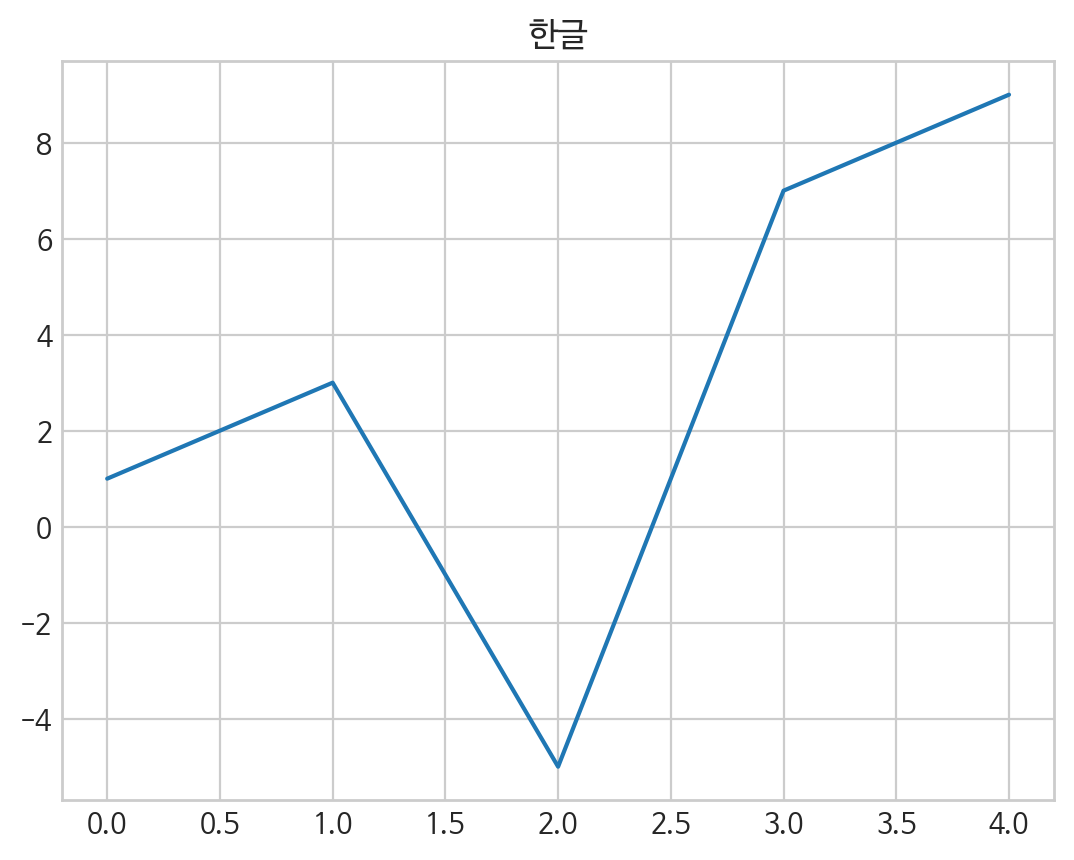

In [3]:
# 그래프 그려보기

pd.Series([1, 3, -5, 7, 9]).plot(title="한글")

In [4]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [5]:
pd.set_option('display.max_columns', None)  # 데이터프레임의 모든열 출력

###데이터 개요

In [6]:
data.shape

(39609, 23)

In [7]:
data.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

###데이터 전처리 및 EDA

In [8]:
data.head(1)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [10]:
data.drop(columns=['ID', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO'], inplace=True)

In [11]:
data.columns

Index(['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',
       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도'],
      dtype='object')

In [12]:
data.isna().sum()

사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
dtype: int64

In [13]:
data.loc[data['사고유형'] == '차량단독']

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
14,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,승용,여,46세,중상,NaN,NaN,NaN,NaN
53,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,승용,남,62세,경상,NaN,NaN,NaN,NaN
100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,승용,여,53세,경상,NaN,NaN,NaN,NaN
118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,승용,남,62세,상해없음,NaN,NaN,NaN,NaN
141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,화물,남,68세,상해없음,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39436,2021-12-27 00,월요일,맑음,대구광역시 수성구 삼덕동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,승용,남,25세,부상신고,NaN,NaN,NaN,NaN
39437,2021-12-27 05,월요일,흐림,대구광역시 달서구 이곡동,기타 - 기타,건조,차량단독,기타,기타,개인형이동수단(PM),남,21세,경상,NaN,NaN,NaN,NaN
39497,2021-12-28 17,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차량단독,기타,안전운전불이행,승합,남,43세,상해없음,NaN,NaN,NaN,NaN
39508,2021-12-29 09,수요일,맑음,대구광역시 달서구 두류동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,승용,남,69세,부상신고,NaN,NaN,NaN,NaN


In [17]:
data['사고유형'] == '차량단독'

0        False
1        False
2        False
3        False
4        False
         ...  
39604    False
39605    False
39606    False
39607    False
39608    False
Name: 사고유형, Length: 39609, dtype: bool

In [20]:
data.loc[data['사고유형'] == '차량단독']['피해운전자 차종']

14       NaN
53       NaN
100      NaN
118      NaN
141      NaN
        ... 
39436    NaN
39437    NaN
39497    NaN
39508    NaN
39521    NaN
Name: 피해운전자 차종, Length: 991, dtype: object

In [21]:
len(data.loc[data['사고유형'] == '차량단독']['피해운전자 차종'])

991

In [23]:
_ = {
    'A': [1, 2, 3, 4, 5],
    'B': [6, 7, 8, 9, 10]
}
df = pd.DataFrame(_)
df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [34]:
df.loc[:, 'A']

0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64

In [35]:
df.iloc[:, 0]

0    1
1    2
2    3
3    4
4    5
Name: A, dtype: int64

<Axes: >

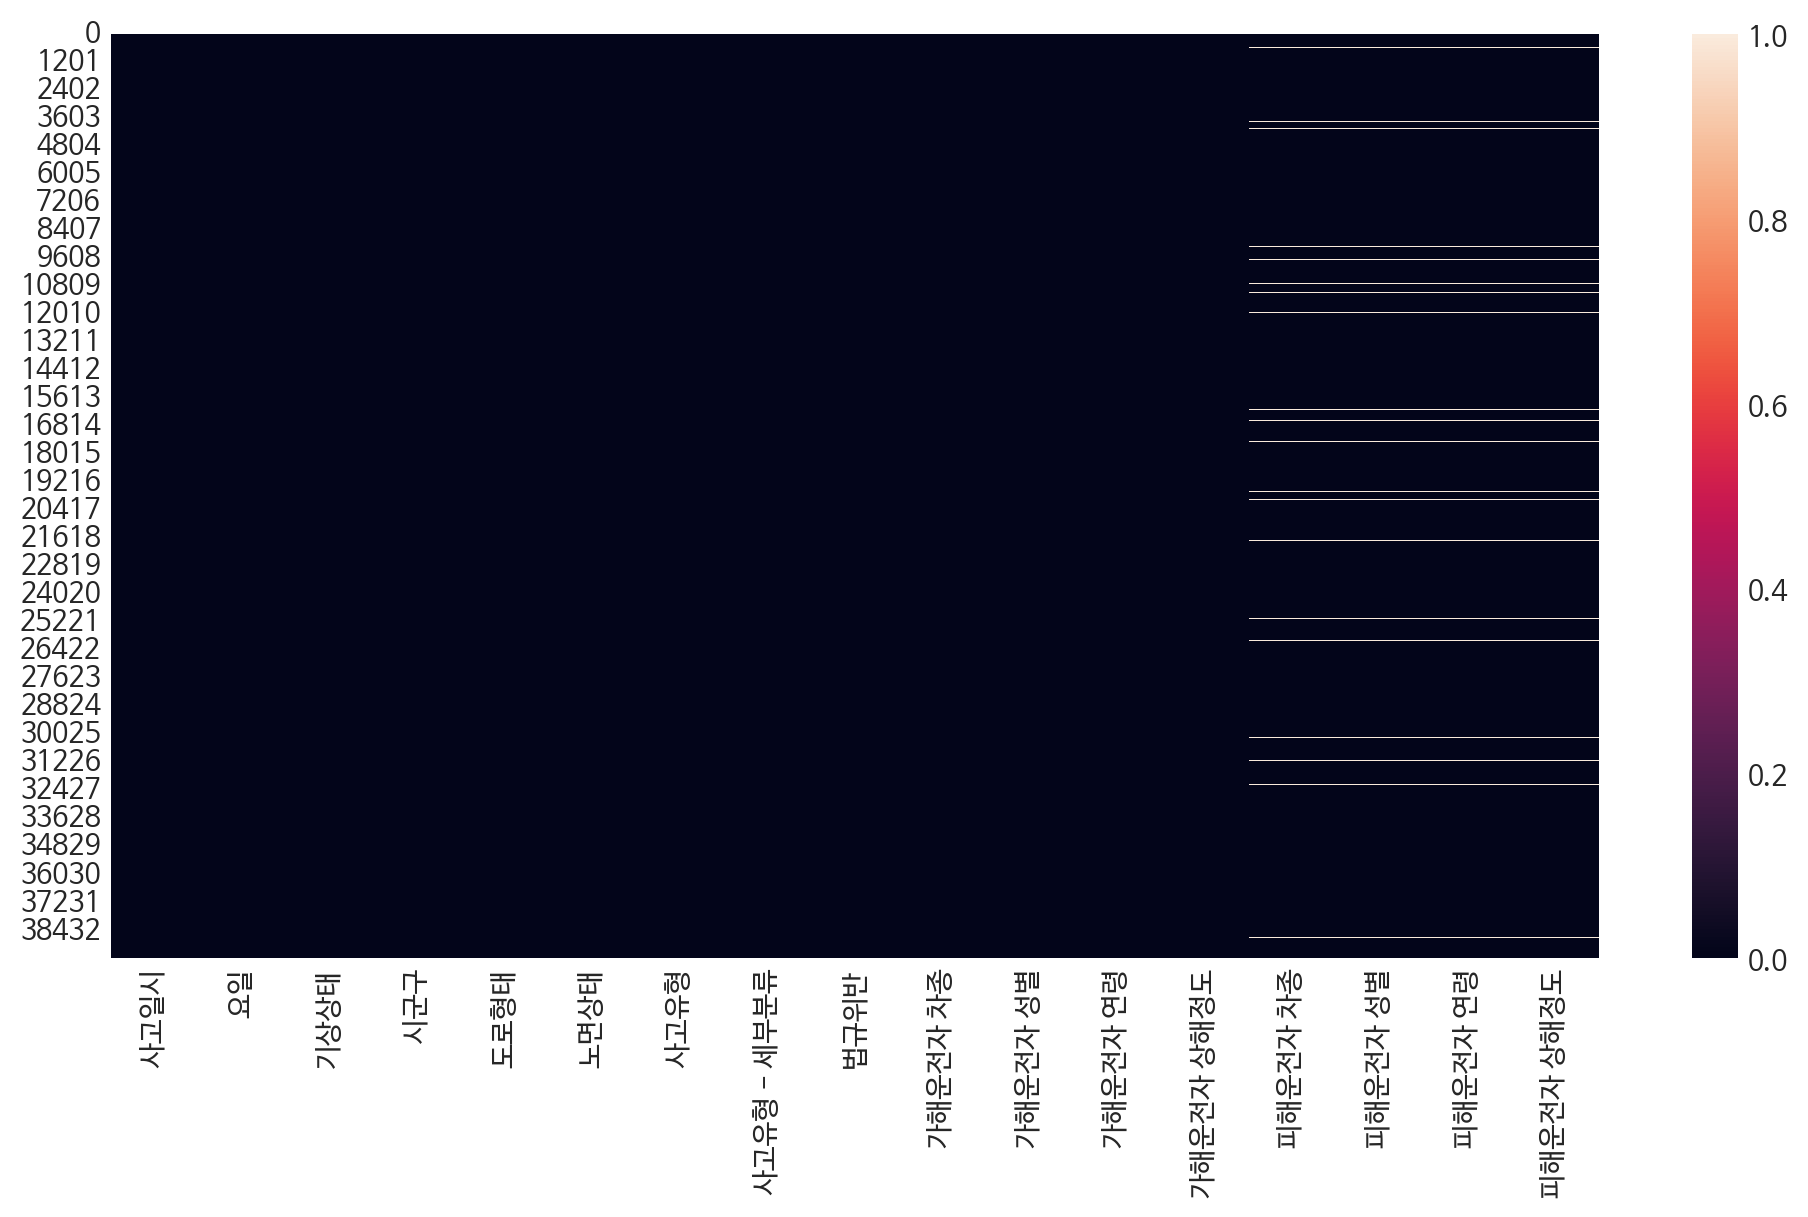

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

In [41]:
data.dropna(axis=0, inplace=True)

In [42]:
data.duplicated().value_counts()

False    38617
True         1
dtype: int64

In [43]:
data[data.duplicated(keep=False)]

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
3359,2019-04-05 11,금요일,맑음,대구광역시 수성구 매호동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승용,남,39세,상해없음,승용,여,37세,경상
3360,2019-04-05 11,금요일,맑음,대구광역시 수성구 매호동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승용,남,39세,상해없음,승용,여,37세,경상


In [44]:
data = data.drop_duplicates()

In [45]:
data.duplicated().value_counts()

False    38617
dtype: int64

In [46]:
data.dtypes

사고일시           object
요일             object
기상상태           object
시군구            object
도로형태           object
노면상태           object
사고유형           object
사고유형 - 세부분류    object
법규위반           object
가해운전자 차종       object
가해운전자 성별       object
가해운전자 연령       object
가해운전자 상해정도     object
피해운전자 차종       object
피해운전자 성별       object
피해운전자 연령       object
피해운전자 상해정도     object
dtype: object

In [47]:
data.describe()

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
count,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617,38617
unique,17798,7,6,199,11,6,2,9,11,12,3,89,6,13,3,97,6
top,2019-11-15 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,승용,남,60세,상해없음,승용,남,59세,경상
freq,13,6025,35327,1710,18813,35579,31784,17103,21022,26322,28188,1009,28926,20314,27505,867,25033


In [48]:
data.nunique()

사고일시           17798
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               2
사고유형 - 세부분류        9
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
dtype: int64

In [49]:
data['피해운전자 상해정도'].value_counts(normalize=True)

경상      0.648238
중상      0.188699
상해없음    0.110858
부상신고    0.039257
기타불명    0.008442
사망      0.004506
Name: 피해운전자 상해정도, dtype: float64

In [50]:
data['피해운전자 상해정도'].value_counts(normalize=True).sort_values(ascending=False)

경상      0.648238
중상      0.188699
상해없음    0.110858
부상신고    0.039257
기타불명    0.008442
사망      0.004506
Name: 피해운전자 상해정도, dtype: float64

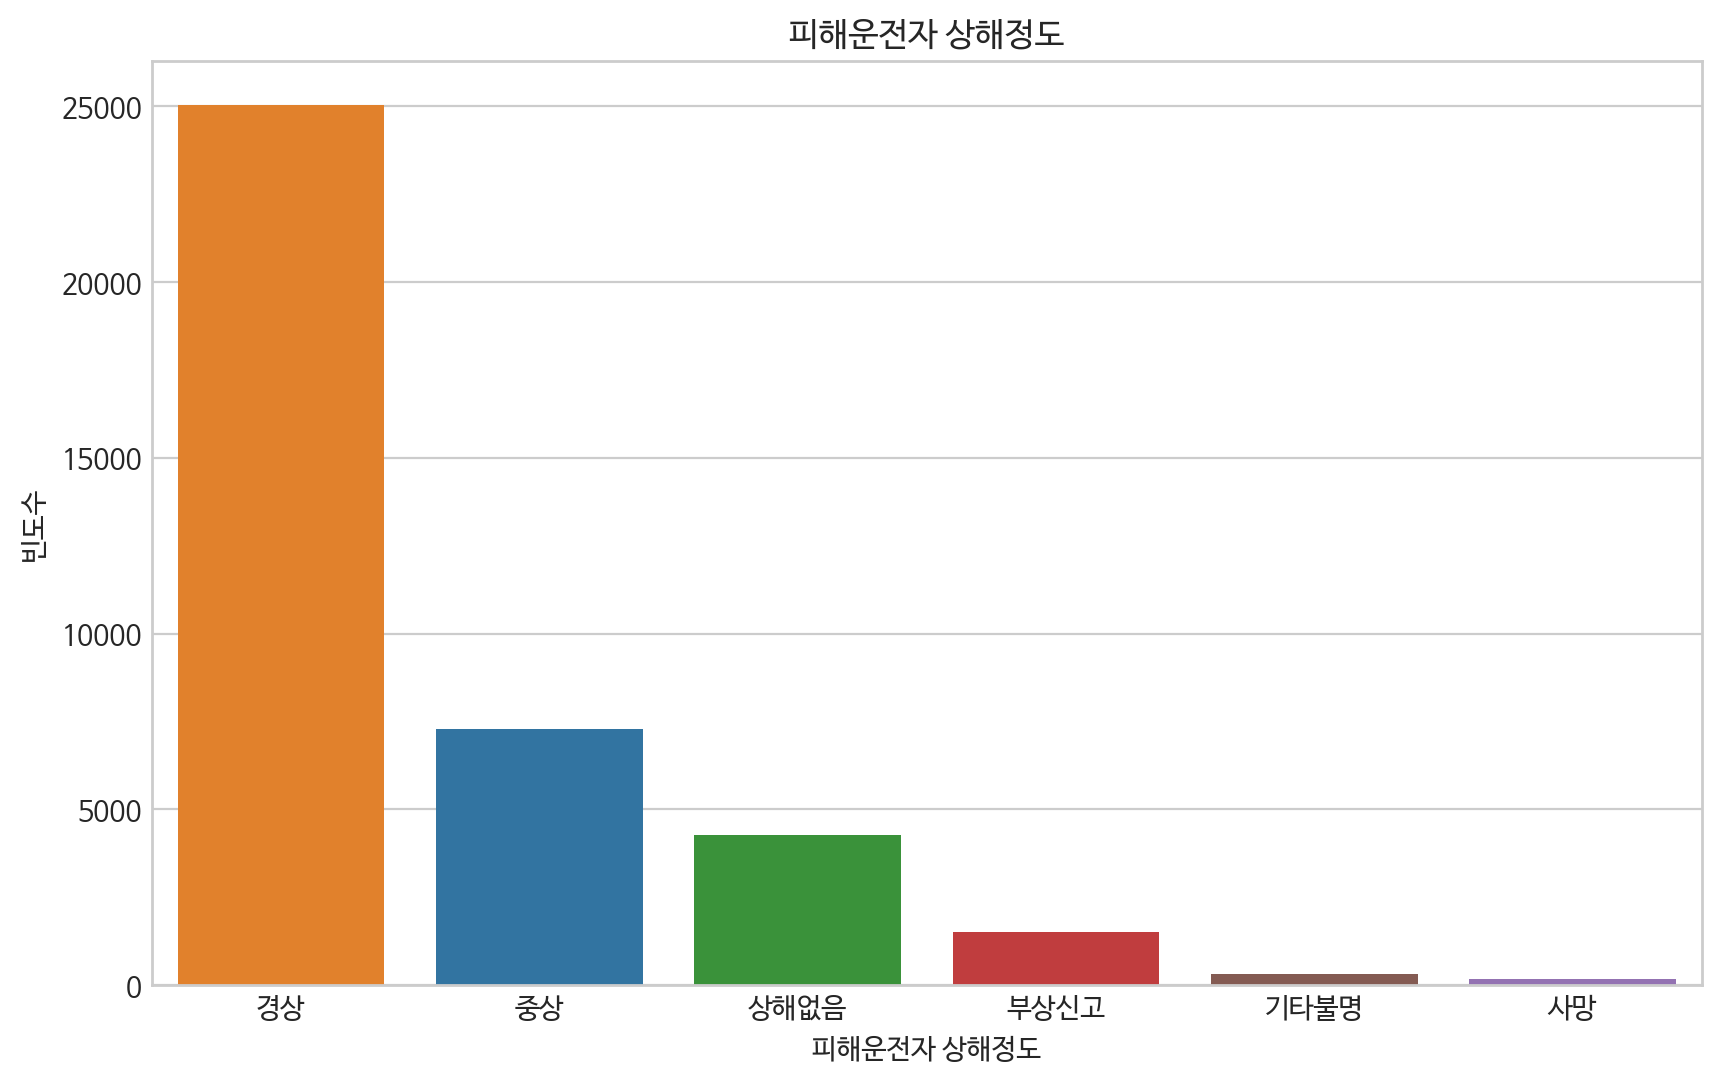

In [56]:
a = data['피해운전자 상해정도'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
plt.title('피해운전자 상해정도')
plt.ylabel('빈도수')
sns.countplot(data=data, x='피해운전자 상해정도', hue='피해운전자 상해정도', order=a.index)

plt.show()

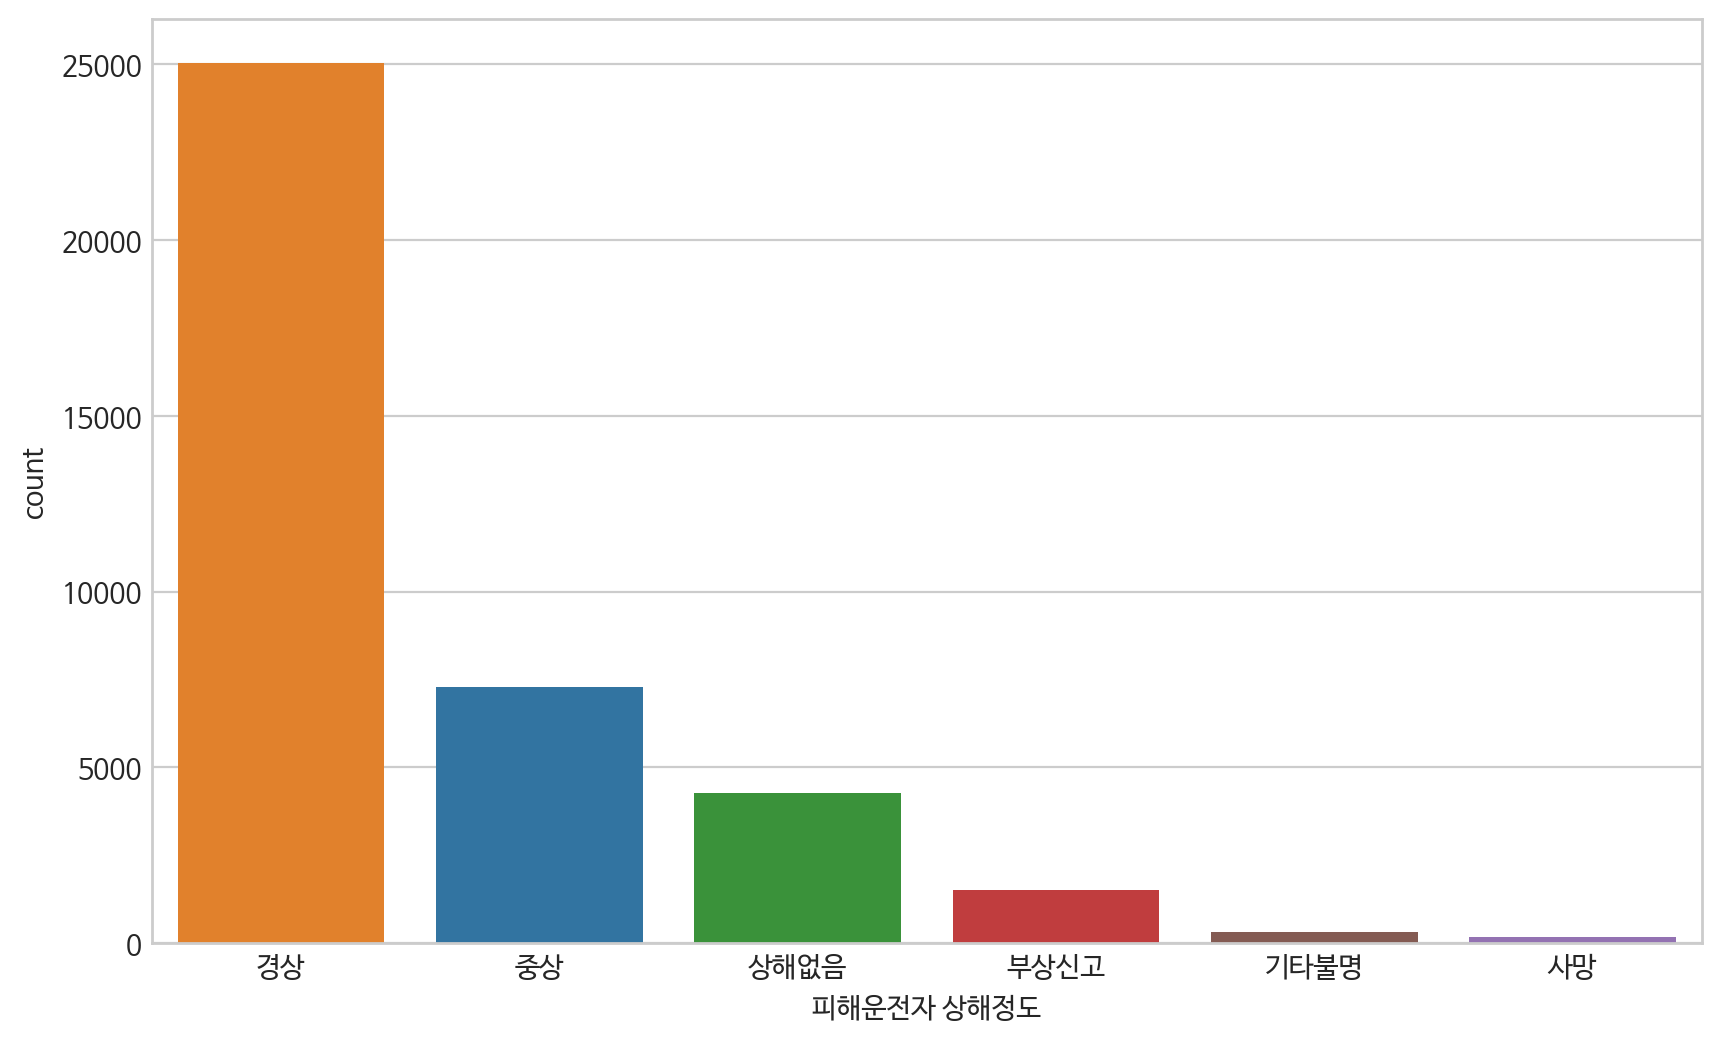

In [54]:
counts = data['피해운전자 상해정도'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
counts_sorted = counts.sort_values(ascending=False)
sns.countplot(data=data, x='피해운전자 상해정도', hue='피해운전자 상해정도', order=counts_sorted.index)

plt.show()

In [57]:
data['피해운전자 연령'].value_counts()

59세       867
57세       844
26세       816
50세       815
58세       809
         ... 
91세         4
93세         2
94세         2
92세         1
98세 이상      1
Name: 피해운전자 연령, Length: 97, dtype: int64

In [58]:
data_df = data.copy()

In [59]:
# 10 단위로 나이 카테고리화 시키기
# 0 ~ 9세 : 아동
def categorize_age(age):
    if age != '미분류':
        if len(age) > 2:
            age_cat = int(age[:2])
            return f'{(age_cat//10) * 10}대'
        else:
            return '아동'

In [60]:
data_df['가해운전자 연령'] = data_df['가해운전자 연령'].apply(categorize_age)
data_df['피해운전자 연령'] = data_df['피해운전자 연령'].apply(categorize_age)

In [61]:
data['사고일시'].head()

0    2019-01-01 00
1    2019-01-01 00
2    2019-01-01 01
3    2019-01-01 02
4    2019-01-01 04
Name: 사고일시, dtype: object

In [62]:
# 날짜, 시간정보 생성
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

data_df[['연', '월', '일', '시간']] = data_df['사고일시'].str.extract(time_pattern)
data_df[['연', '월', '일', '시간']] = data_df[['연', '월', '일', '시간']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
data_df = data_df.drop(columns=['사고일시', '연'])

In [63]:
data['시군구'].head(1)

0    대구광역시 중구 대신동
Name: 시군구, dtype: object

In [64]:
# 공간 정보 생성
location_pattern = r'(\S+) (\S+) (\S+)'

data_df[['도시', '구', '동']] = data_df['시군구'].str.extract(location_pattern)
data_df = data_df.drop(columns=['시군구', '도시'])

In [65]:
data['도로형태'].value_counts()

단일로 - 기타           18813
교차로 - 교차로안          9835
교차로 - 교차로부근         5637
기타 - 기타             1921
교차로 - 교차로횡단보도내      1469
단일로 - 지하차도(도로)내      295
주차장 - 주차장            226
단일로 - 교량             223
단일로 - 고가도로위          131
단일로 - 터널              60
미분류 - 미분류              7
Name: 도로형태, dtype: int64

In [66]:
# 도로 형태 정보 추출
road_pattern = r'(.+) - (.+)'

data_df[['도로형태1', '도로형태2']] = data_df['도로형태'].str.extract(road_pattern)
data_df = data_df.drop(columns=['도로형태', '도로형태2'])
data_df.rename(columns={'도로형태1':'도로형태'}, inplace=True)

In [67]:
data_df['도로형태'].value_counts()

단일로    19522
교차로    16941
기타      1921
주차장      226
미분류        7
Name: 도로형태, dtype: int64

In [68]:
data_df = data_df[(data_df['도로형태'] != '기타') & (data_df['도로형태'] != '미분류')]

In [69]:
data_df['도로형태'].value_counts()

단일로    19522
교차로    16941
주차장      226
Name: 도로형태, dtype: int64

In [70]:
data_df.columns

Index(['요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반', '가해운전자 차종',
       '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도', '월', '일', '시간', '구', '동', '도로형태'],
      dtype='object')

In [71]:
data.shape

(38617, 17)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 그래프의 크기 설정
plt.figure(figsize=(22, 48))

# 데이터프레임의 각 열에 대해 반복하면서 카운트 플롯 그리기
for i, column in enumerate(data.columns):
    plt.subplot(9, 2, i+1)
    # 문자열 형식의 데이터에 대해서는 countplot을 사용하여 각 값의 빈도수를 시각화
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=10)  # x축 레이블의 각도 설정
    plt.title(column)  # 그래프 제목 설정

plt.tight_layout()  # 그래프 간격 조절
plt.show()

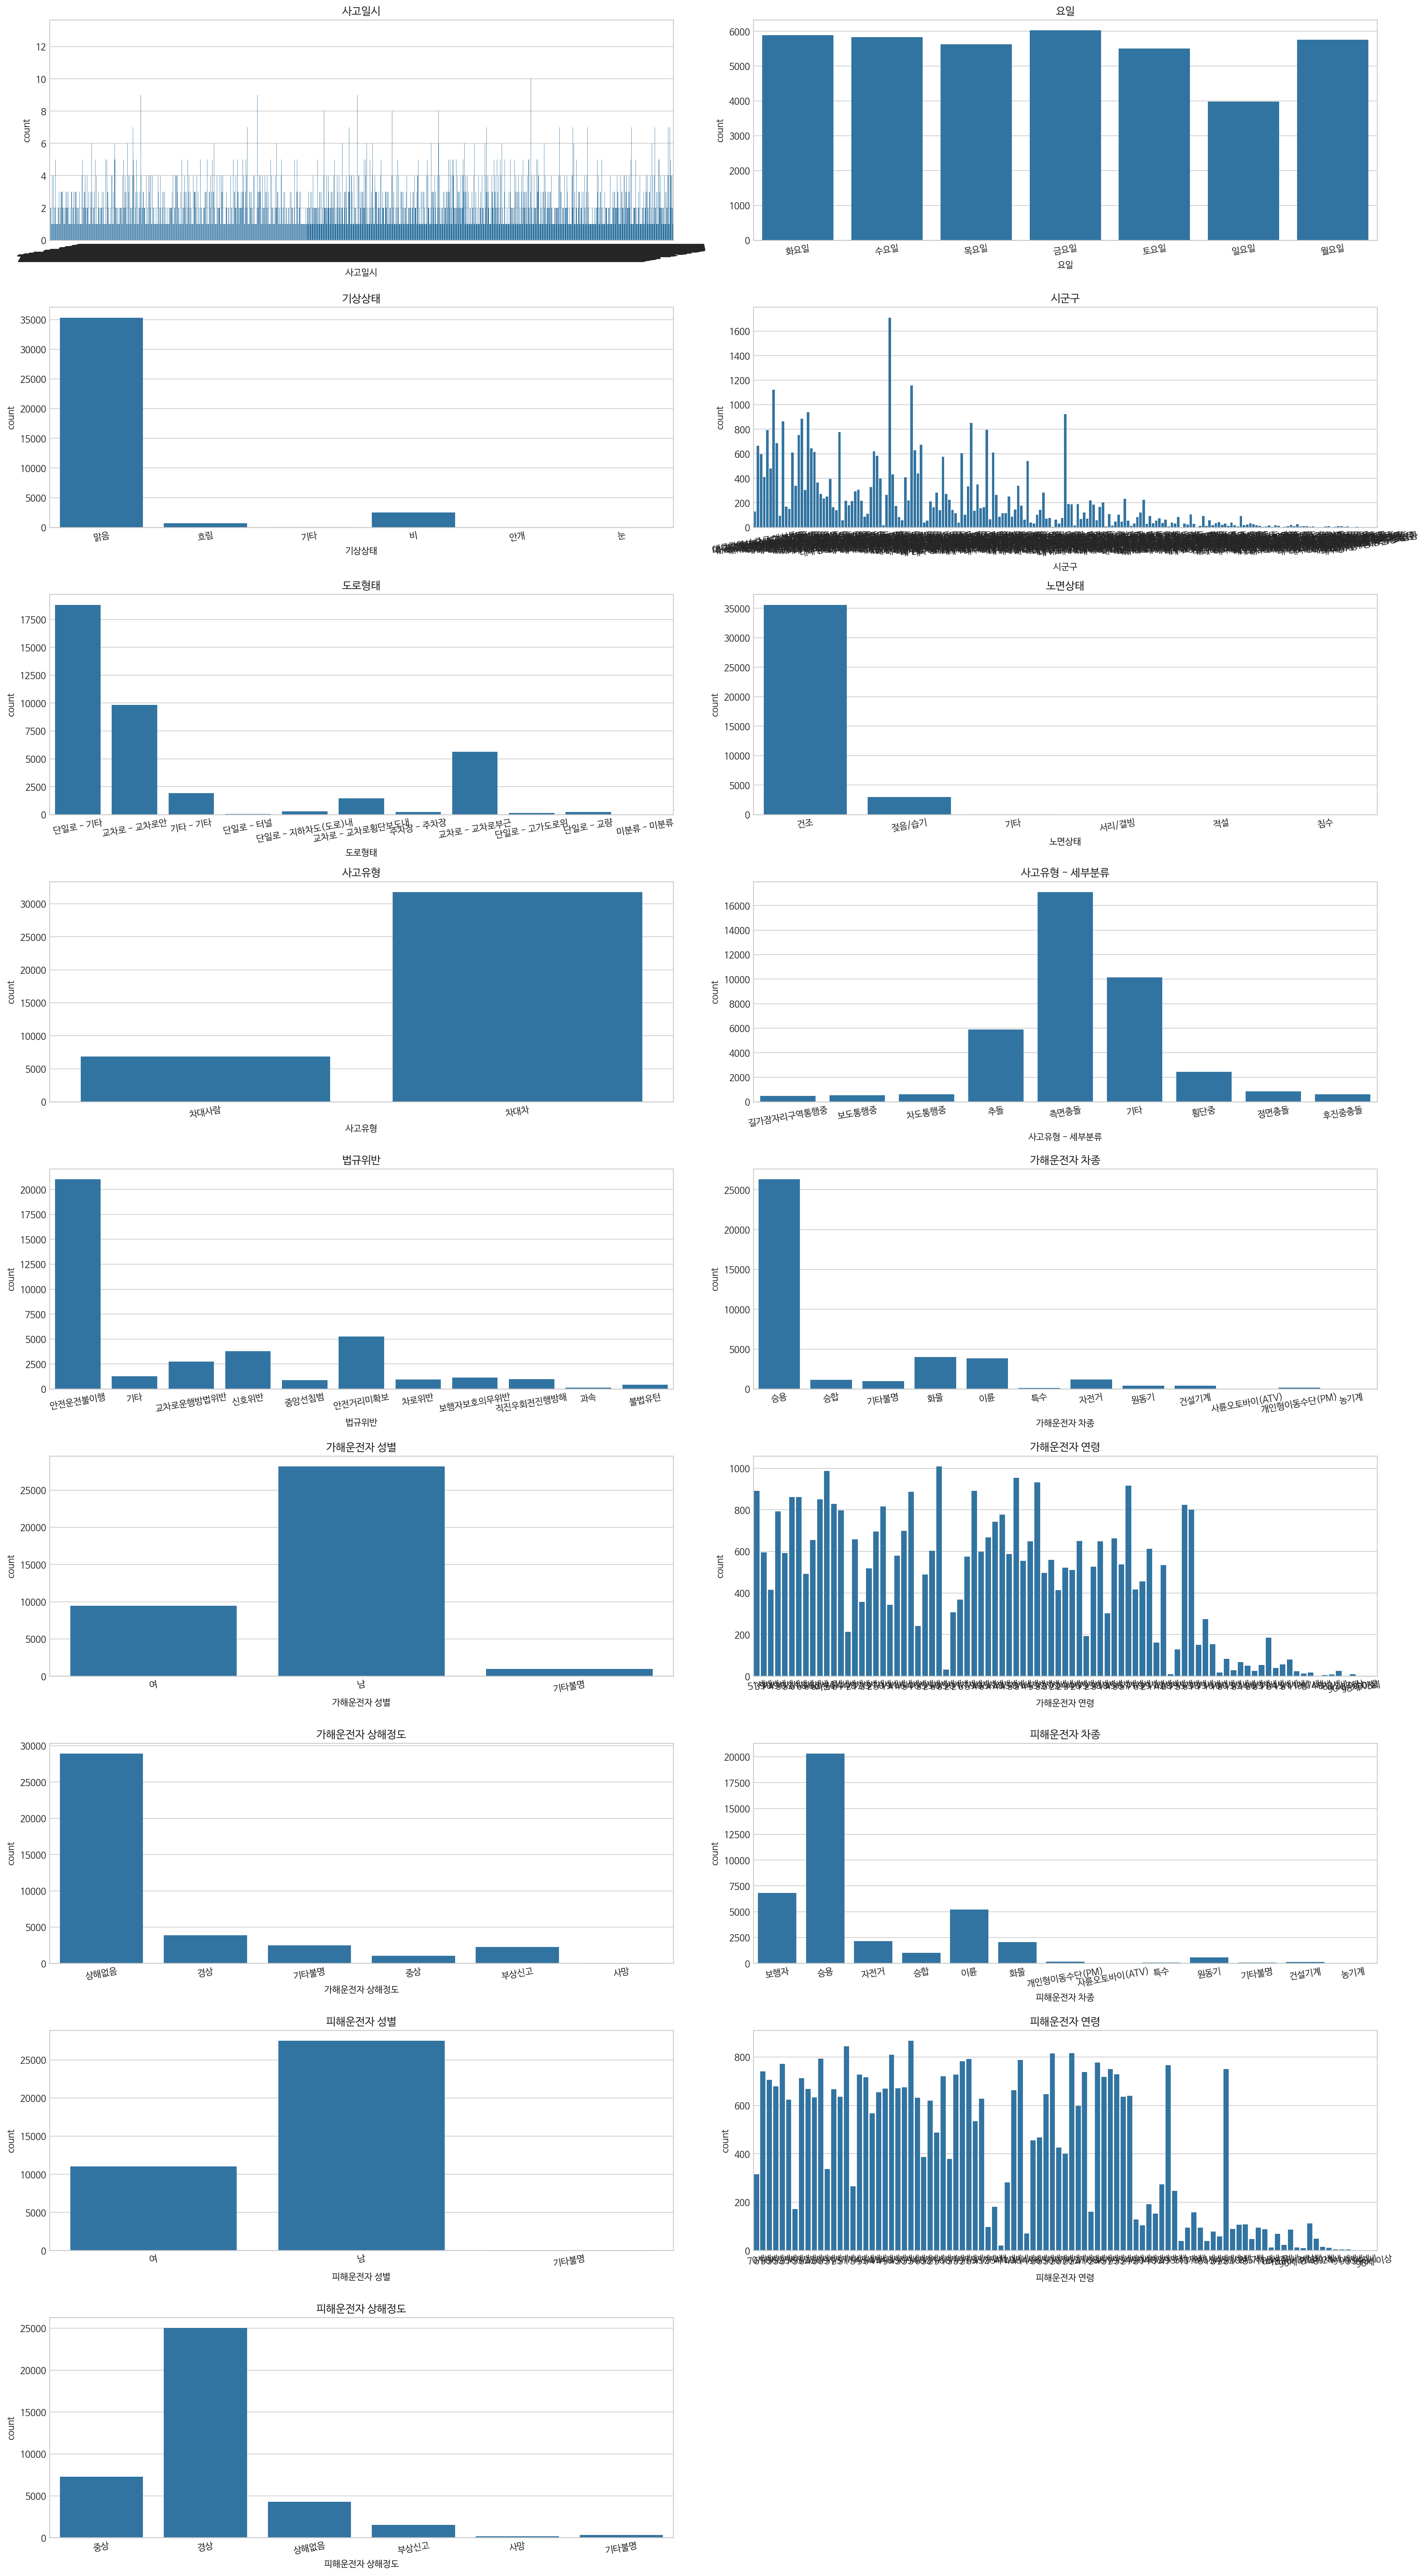

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 그래프의 크기 설정
plt.figure(figsize=(22, 48))

# 데이터프레임의 각 열에 대해 반복하면서 카운트 플롯 그리기
for i, column in enumerate(data.columns):
    plt.subplot(11, 2, i+1)
    # 문자열 형식의 데이터에 대해서는 countplot을 사용하여 각 값의 빈도수를 시각화
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=10)  # x축 레이블의 각도 설정
    plt.title(column)  # 그래프 제목 설정

plt.tight_layout()  # 그래프 간격 조절
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

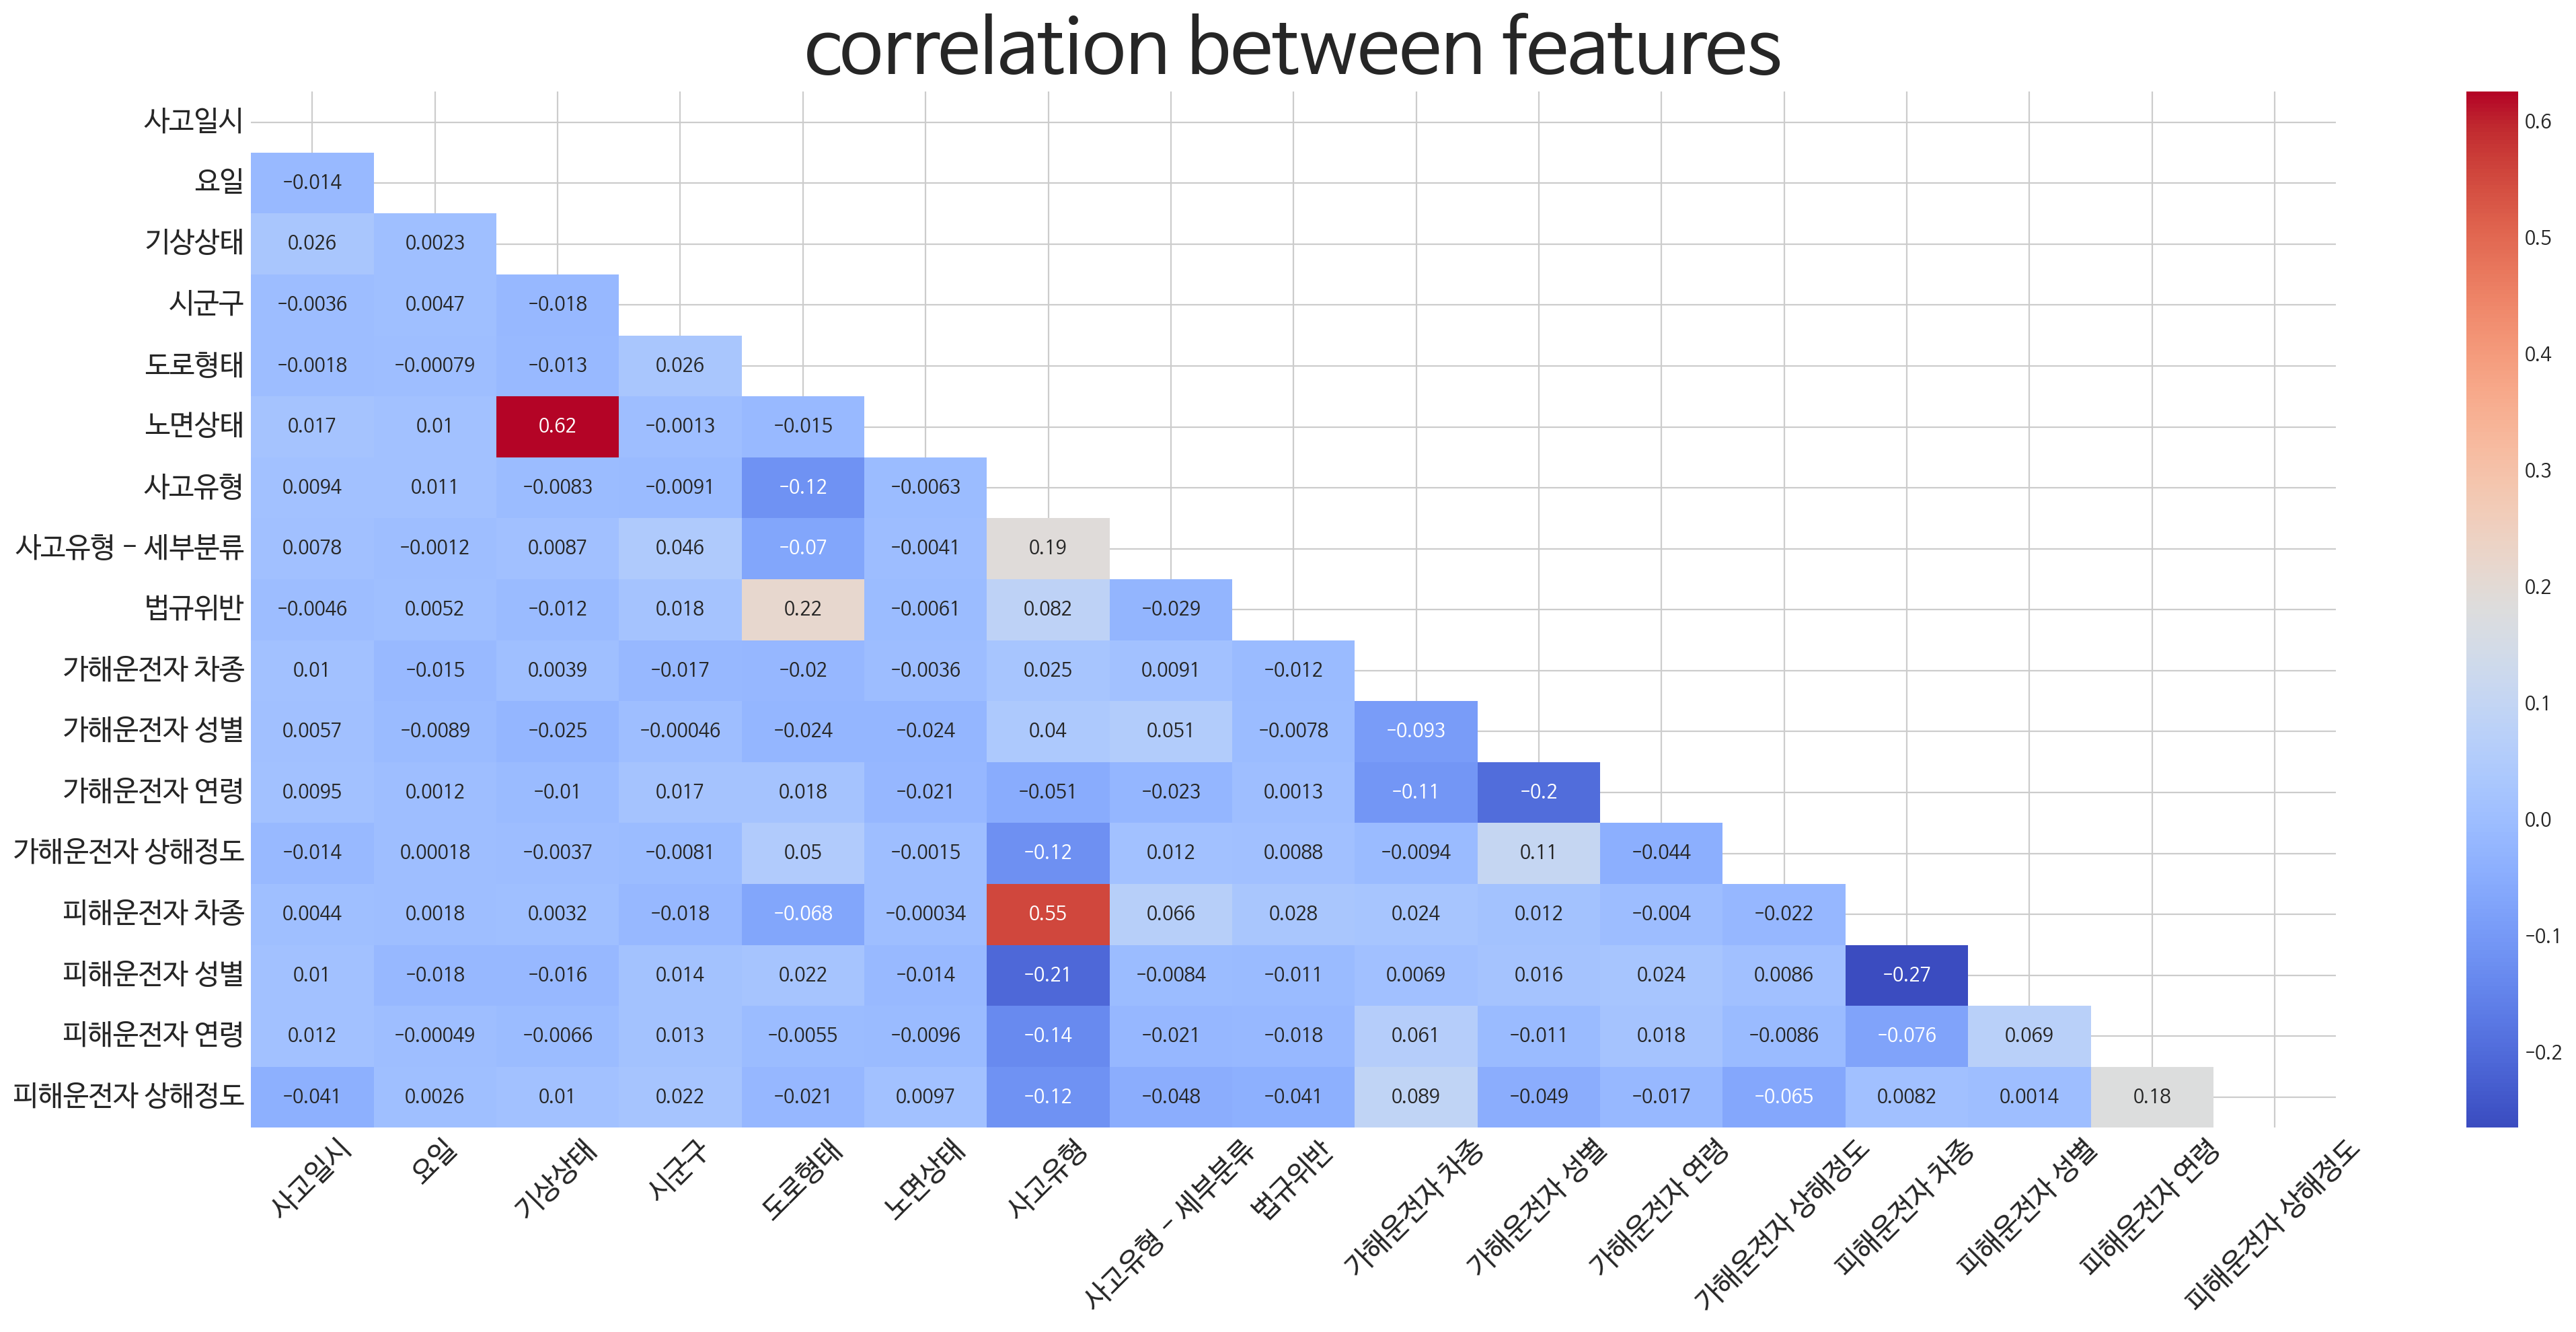

In [ ]:
plt.figure(figsize=(25,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

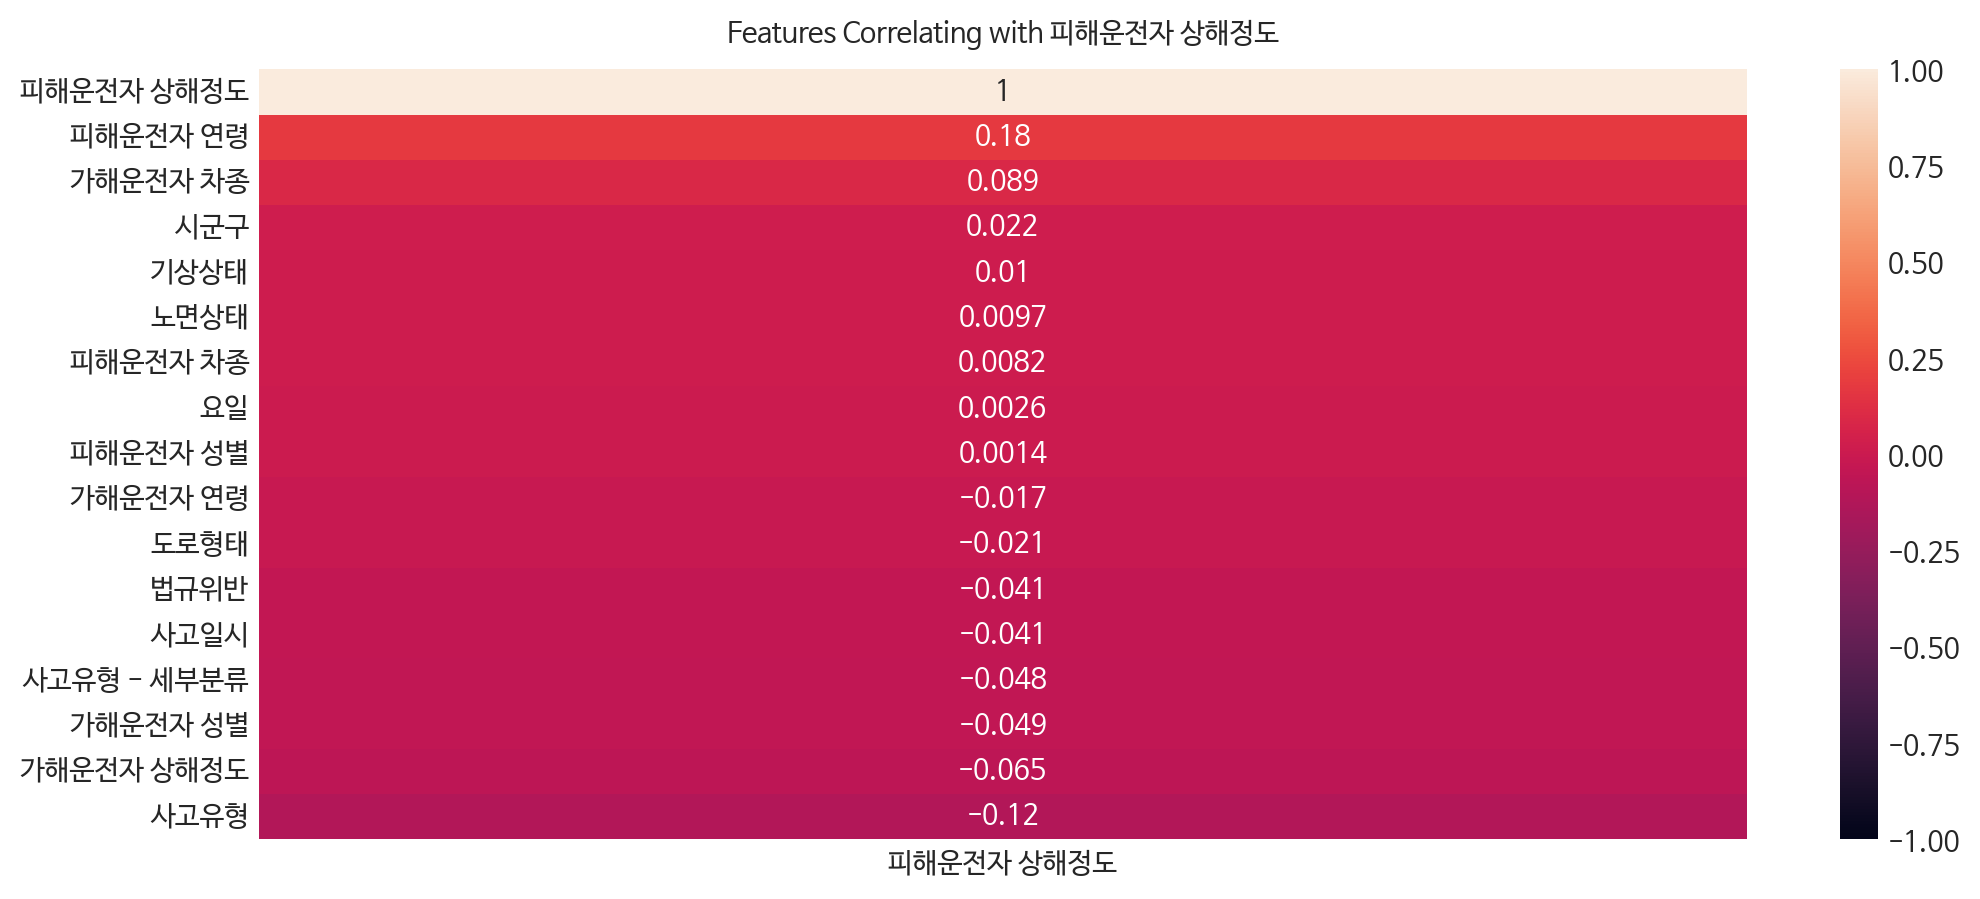

In [ ]:
plt.figure(figsize=(12, 5), dpi=100)

heatmap = sns.heatmap(corr_df.corr()[['피해운전자 상해정도']].sort_values(by='피해운전자 상해정도', ascending=False), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Features Correlating with 피해운전자 상해정도', fontdict={'fontsize': 10}, pad=10)
plt.show()

In [ ]:
data_df['구'].value_counts()

달서구    9124
북구     6276
수성구    6137
동구     4943
서구     3343
달성군    2406
남구     2356
중구     2104
Name: 구, dtype: int64

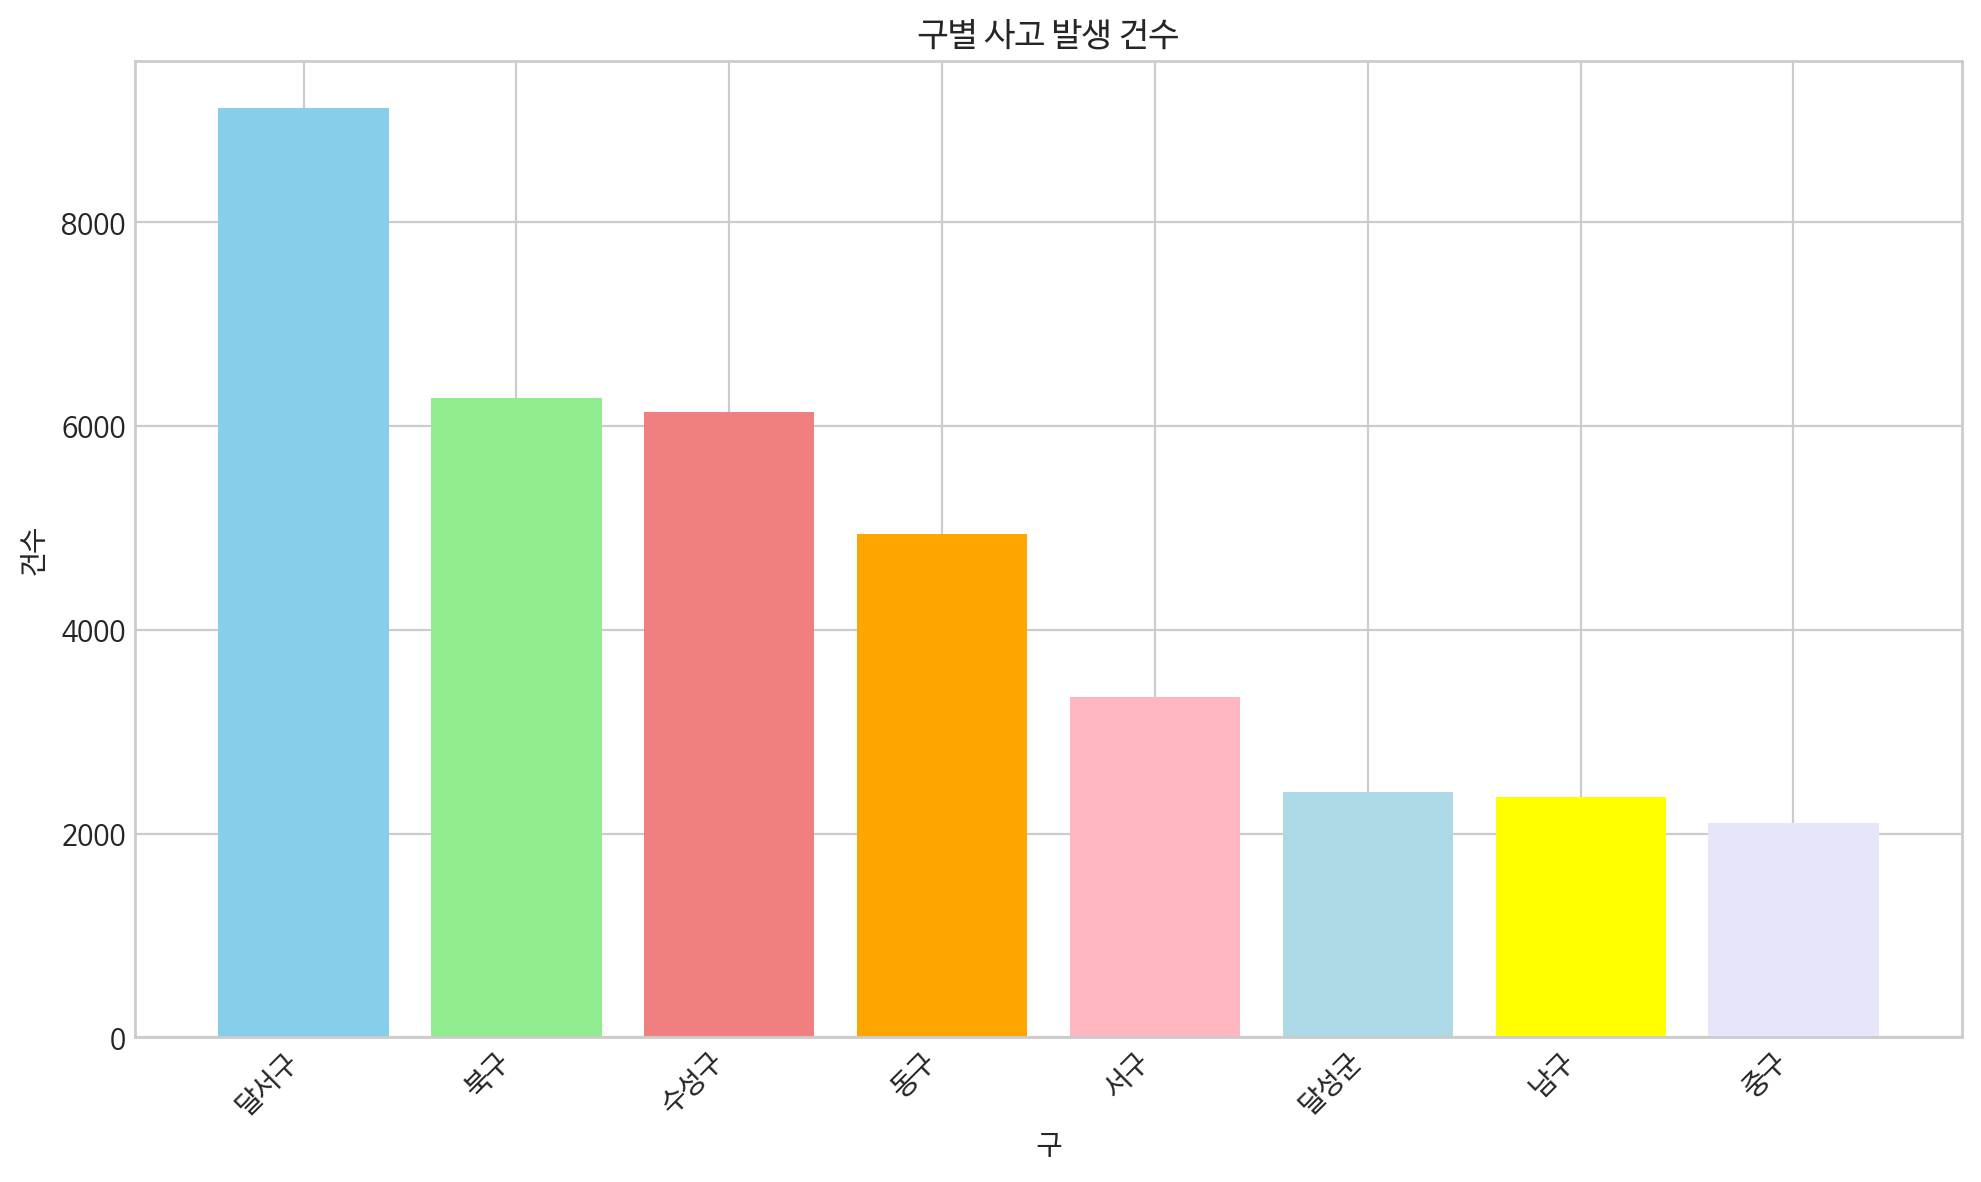

In [ ]:
구_counts = data_df['구'].value_counts()
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'lightblue', 'yellow', 'lavender']

plt.figure(figsize=(10, 6))
plt.bar(구_counts.index, 구_counts.values, color=colors)
plt.title('구별 사고 발생 건수')
plt.xlabel('구')
plt.ylabel('건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import folium
from folium import plugins
from IPython.display import IFrame

# 각 구의 위도와 경도
locations = {
    '남구': (35.845062, 128.605548),
    '달서구': (35.831459, 128.553673),
    '달성군': (35.799978, 128.511346),
    '동구': (35.879983, 128.626486),
    '북구': (35.892947, 128.581282),
    '서구': (35.871380, 128.556865),
    '수성구': (35.858172, 128.635055),
    '중구': (35.869144, 128.597830)
}

# 각 구별 사고발생 횟수
data = {
    '남구': 2356,
    '달서구': 9124,
    '달성군': 2406,
    '동구': 4943,
    '북구': 6276,
    '서구': 3343,
    '수성구': 6137,
    '중구': 2104
}

# 대구 지도의 중심 위치
center = (35.8714, 128.6014)

# 지도 객체 생성
m = folium.Map(location=center, zoom_start=11)

# 숫자를 마커로 추가
for location, count in data.items():
    popup_text = f"{location} 사고발생 횟수: {count}"
    folium.Marker(location=locations[location], popup=folium.Popup(popup_text, max_width=300), icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

m

In [ ]:
import folium
from folium.plugins import HeatMap

# 대구의 중심 좌표
center_coords = [35.8714, 128.6014]

# 대구시 교통사고 데이터
accident_data = [
    {"구": "남구", "횟수": 2356, "위도": 35.845062, "경도": 128.605548},
    {"구": "달서구", "횟수": 9124, "위도": 35.831459, "경도": 128.553673},
    {"구": "달성군", "횟수": 2406, "위도": 35.799978, "경도": 128.511346},
    {"구": "동구", "횟수": 4943, "위도": 35.879983, "경도": 128.626486},
    {"구": "북구", "횟수": 6276, "위도": 35.892947, "경도": 128.581282},
    {"구": "서구", "횟수": 3343, "위도": 35.871380, "경도": 128.556865},
    {"구": "수성구", "횟수": 6137, "위도": 35.858172, "경도": 128.635055},
    {"구": "중구", "횟수": 2104, "위도": 35.869144, "경도": 128.597830}
]

map_accidents = folium.Map(location=center_coords, zoom_start=12)

heat_data = [[point["위도"], point["경도"], point["횟수"]] for point in accident_data]
HeatMap(heat_data).add_to(map_accidents)

map_accidents

In [ ]:
data_df['도로형태'].value_counts()

단일로    19522
교차로    16941
주차장      226
Name: 도로형태, dtype: int64

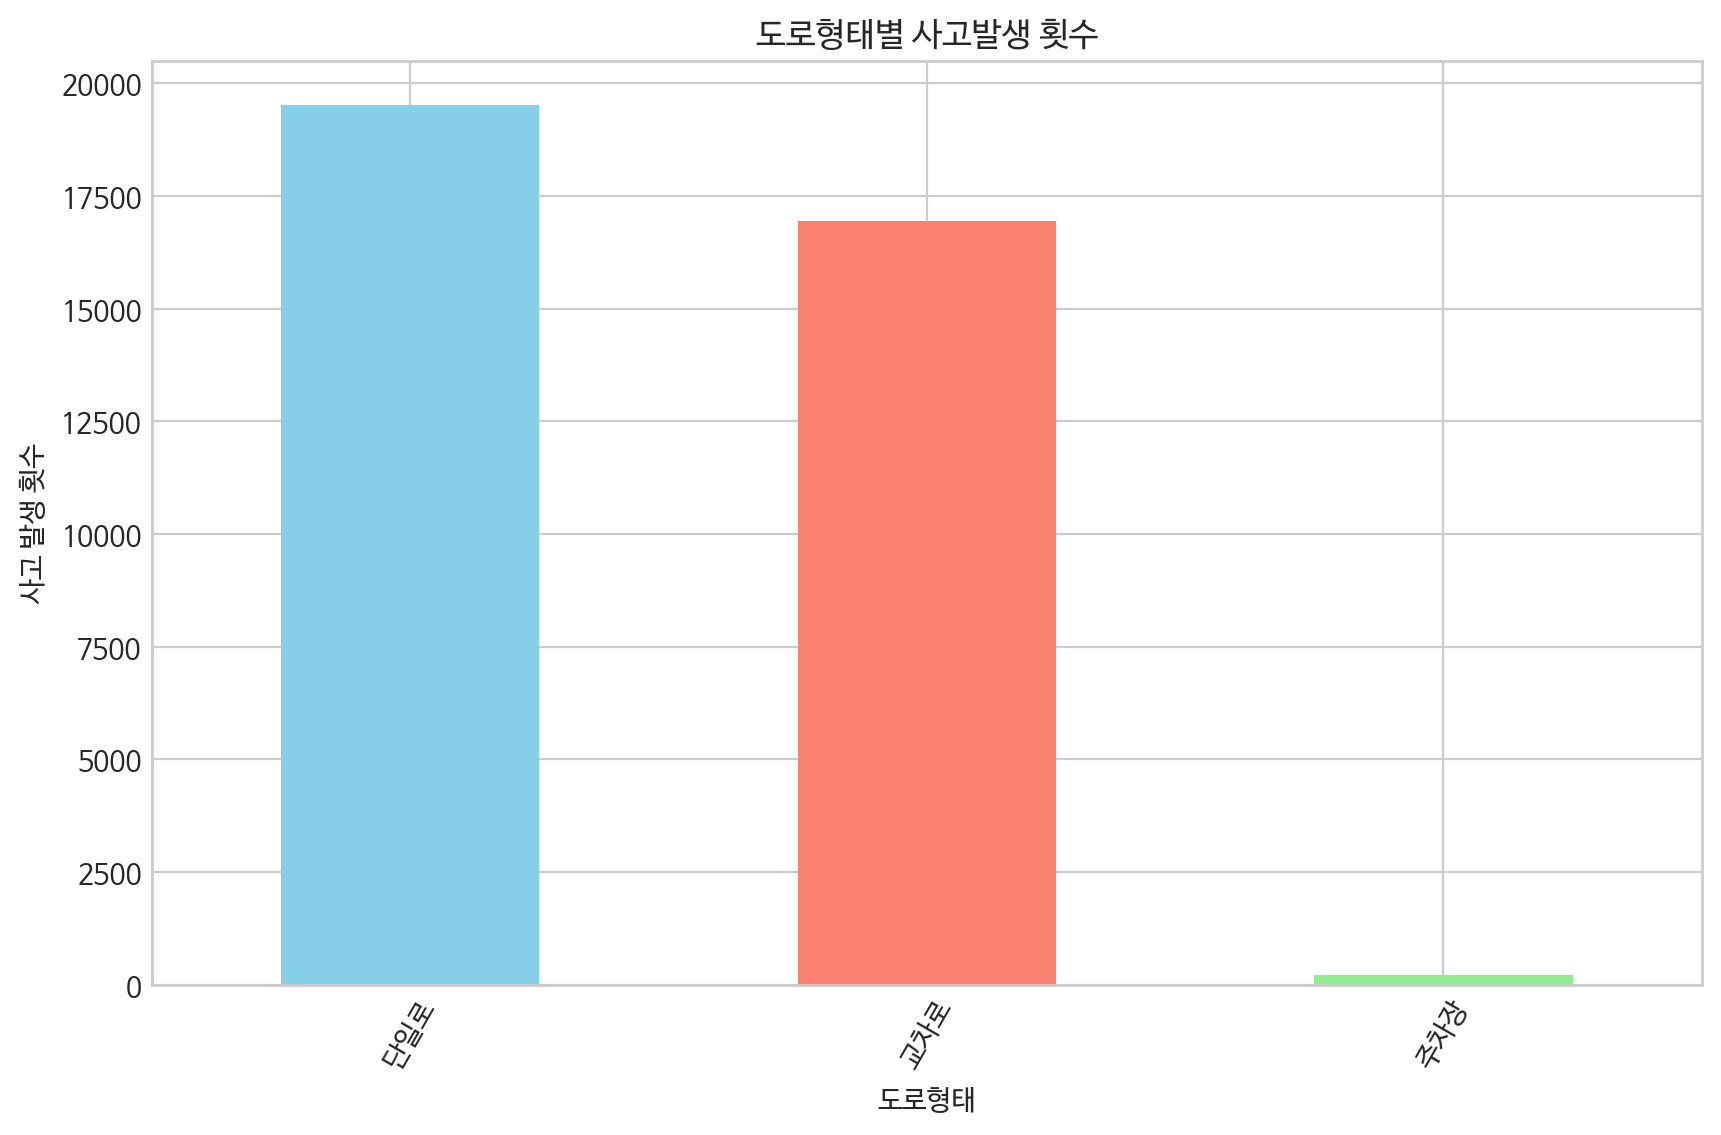

In [ ]:
road_shape_count = data_df['도로형태'].value_counts()
bar_plot = road_shape_count.plot(kind="bar", figsize=(10, 6), rot=60, title="도로형태별 사고발생 횟수")
bar_plot.patches[0].set_facecolor('skyblue')
bar_plot.patches[1].set_facecolor('salmon')
bar_plot.patches[2].set_facecolor('lightgreen')

plt.xlabel('도로형태')
plt.ylabel('사고 발생 횟수')

plt.show()

In [ ]:
data_df.groupby('도로형태')['피해운전자 상해정도'].value_counts()

도로형태  피해운전자 상해정도
교차로   경상            10851
      중상             3424
      상해없음           2023
      부상신고            501
      기타불명             78
      사망               64
단일로   경상            12766
      중상             3484
      상해없음           2062
      부상신고            889
      기타불명            217
      사망              104
주차장   경상              159
      중상               25
      부상신고             21
      상해없음             14
      기타불명              7
Name: 피해운전자 상해정도, dtype: int64

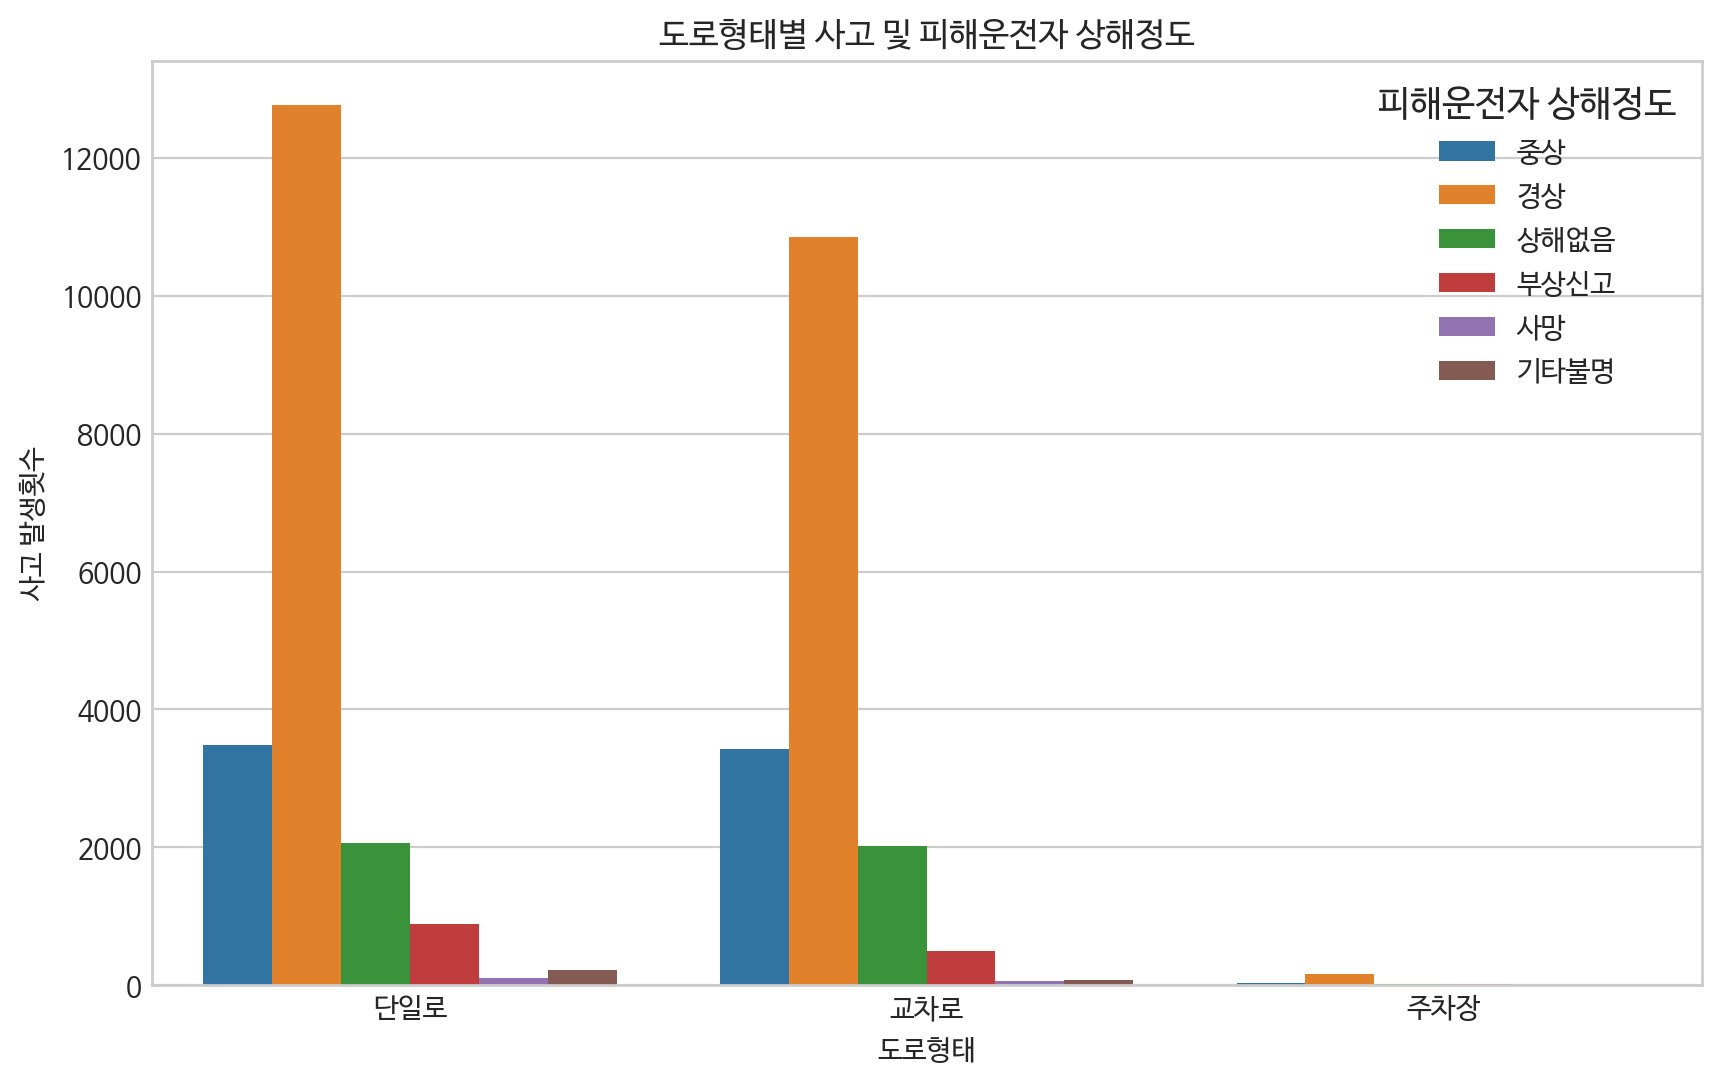

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 카운트 플롯 그리기
ax = sns.countplot(data=data_df, x='도로형태', hue='피해운전자 상해정도')

# 타이틀 설정
plt.title('도로형태별 사고 및 피해운전자 상해정도')

# y축 이름 설정
plt.ylabel('사고 발생횟수')

# 범례 위치 조정
plt.legend(title='피해운전자 상해정도', title_fontsize='13')

# 그래프 보여주기
plt.show()

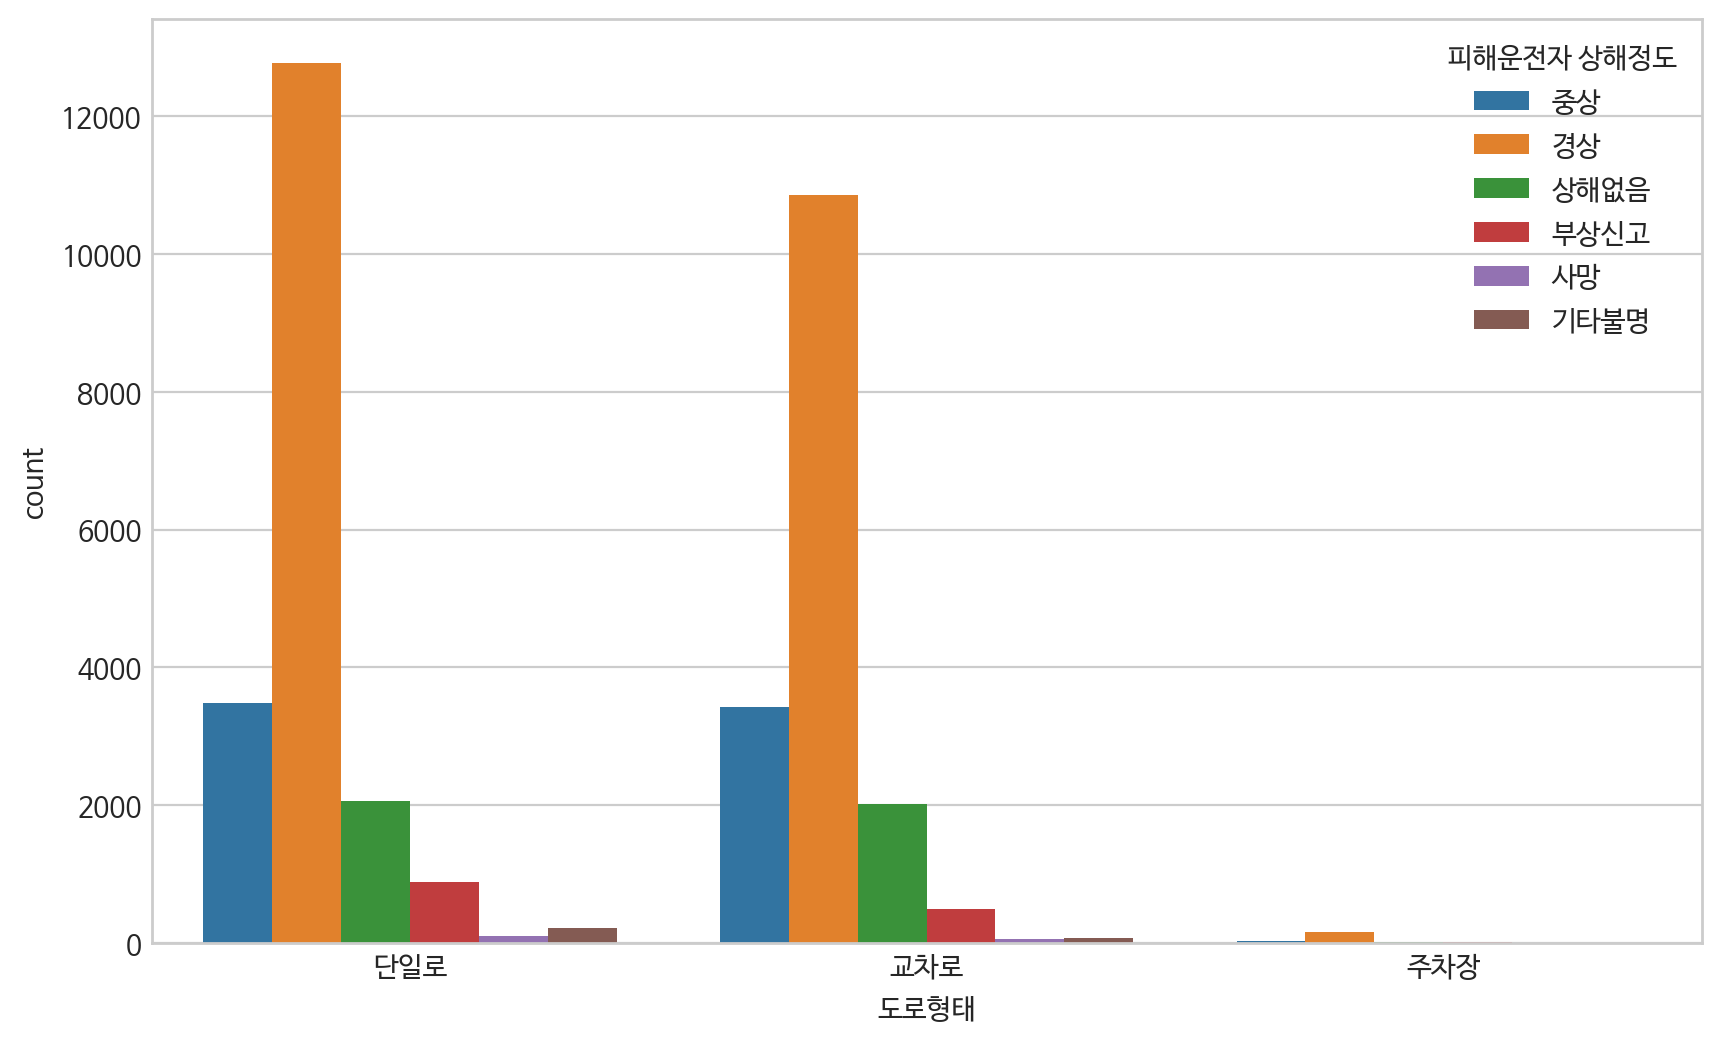

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='도로형태', hue='피해운전자 상해정도')
plt.show()

In [ ]:
data_df.groupby(['도로형태', '피해운전자 상해정도','구'])['구'].count()

도로형태  피해운전자 상해정도  구  
교차로   경상          남구      740
                  달서구    2819
                  달성군     843
                  동구     1403
                  북구     1764
                         ... 
주차장   중상          동구        3
                  북구        2
                  서구        2
                  수성구       4
                  중구        1
Name: 구, Length: 127, dtype: int64

In [ ]:
pd.pivot_table(data_df, index=['도로형태','피해운전자 상해정도'], columns=['구'], aggfunc=['count'])

count                                                 \
                가해운전자 상해정도                                                  
구                       남구     달서구    달성군      동구      북구      서구     수성구   
도로형태 피해운전자 상해정도                                                             
교차로  경상              740.0  2819.0  843.0  1403.0  1764.0   953.0  1876.0   
     기타불명              5.0    16.0    6.0     8.0    21.0     5.0    14.0   
     부상신고             32.0   130.0   31.0    63.0   103.0    30.0    74.0   
     사망                7.0    10.0    8.0     9.0    12.0     6.0     7.0   
     상해없음            113.0   433.0  127.0   300.0   419.0   267.0   252.0   
     중상              189.0   831.0  304.0   480.0   627.0   317.0   511.0   
단일로  경상              828.0  3304.0  666.0  1751.0  2064.0  1063.0  2279.0   
     기타불명             14.0    55.0   16.0    29.0    41.0    19.0    34.0   
     부상신고             91.0   186.0   37.0    86.0   145.0    97.0   109.0   
     사망                4.0    18.0   18.0    19.0    15.0    11.0     8.0   
     상해없음             97.0   459.0  112.0   294.0   396.0   234.0   326.0   
     중상              226.0   785.0  201.0   483.0   650.0   331.0   599.0   
주차장  경상                8.0    57.0   25.0    13.0    11.0     4.0    37.0   
     기타불명              NaN     2.0    2.0     NaN     3.0     NaN     NaN   
     부상신고              1.0     6.0    3.0     NaN     3.0     3.0     4.0   
     상해없음              NaN     5.0    3.0     2.0     NaN     1.0     3.0   
     중상                1.0     8.0    4.0     3.0     2.0     2.0     4.0   

                                                                        \
                       가해운전자 성별                                          
구                   중구       남구     달서구    달성군      동구      북구      서구   
도로형태 피해운전자 상해정도                                                          
교차로  경상          453.0    740.0  2819.0  843.0  1403.0  1764.0   953.0   
     기타불명          3.0      5.0    16.0    6.0     8.0    21.0     5.0   
     부상신고         38.0     32.0   130.0   31.0    63.0   103.0    30.0   
     사망            5.0      7.0    10.0    8.0     9.0    12.0     6.0   
     상해없음        112.0    113.0   433.0  127.0   300.0   419.0   267.0   
     중상          165.0    189.0   831.0  304.0   480.0   627.0   317.0   
단일로  경상          811.0    828.0  3304.0  666.0  1751.0  2064.0  1063.0   
     기타불명          9.0     14.0    55.0   16.0    29.0    41.0    19.0   
     부상신고        138.0     91.0   186.0   37.0    86.0   145.0    97.0   
     사망           11.0      4.0    18.0   18.0    19.0    15.0    11.0   
     상해없음        144.0     97.0   459.0  112.0   294.0   396.0   234.0   
     중상          209.0    226.0   785.0  201.0   483.0   650.0   331.0   
주차장  경상            4.0      8.0    57.0   25.0    13.0    11.0     4.0   
     기타불명          NaN      NaN     2.0    2.0     NaN     3.0     NaN   
     부상신고          1.0      1.0     6.0    3.0     NaN     3.0     3.0   
     상해없음          NaN      NaN     5.0    3.0     2.0     NaN     1.0   
     중상            1.0      1.0     8.0    4.0     3.0     2.0     2.0   

                                                                        \
                               가해운전자 연령                                  
구                   수성구     중구       남구     달서구    달성군      동구      북구   
도로형태 피해운전자 상해정도                                                          
교차로  경상          1876.0  453.0    728.0  2784.0  835.0  1382.0  1735.0   
     기타불명          14.0    3.0      5.0    16.0    6.0     8.0    21.0   
     부상신고          74.0   38.0     23.0   102.0   31.0    47.0    84.0   
     사망             7.0    5.0      7.0    10.0    8.0     9.0    12.0   
     상해없음         252.0  112.0    110.0   431.0  125.0   295.0   412.0   
     중상           511.0  165.0    188.0   824.0  301.0   474.0   625.0   
단일로  경상          2279.0  811.0    809.0  3250.0  648.0  1707.0  2017.0   
     기타불명          34.0    9.0    

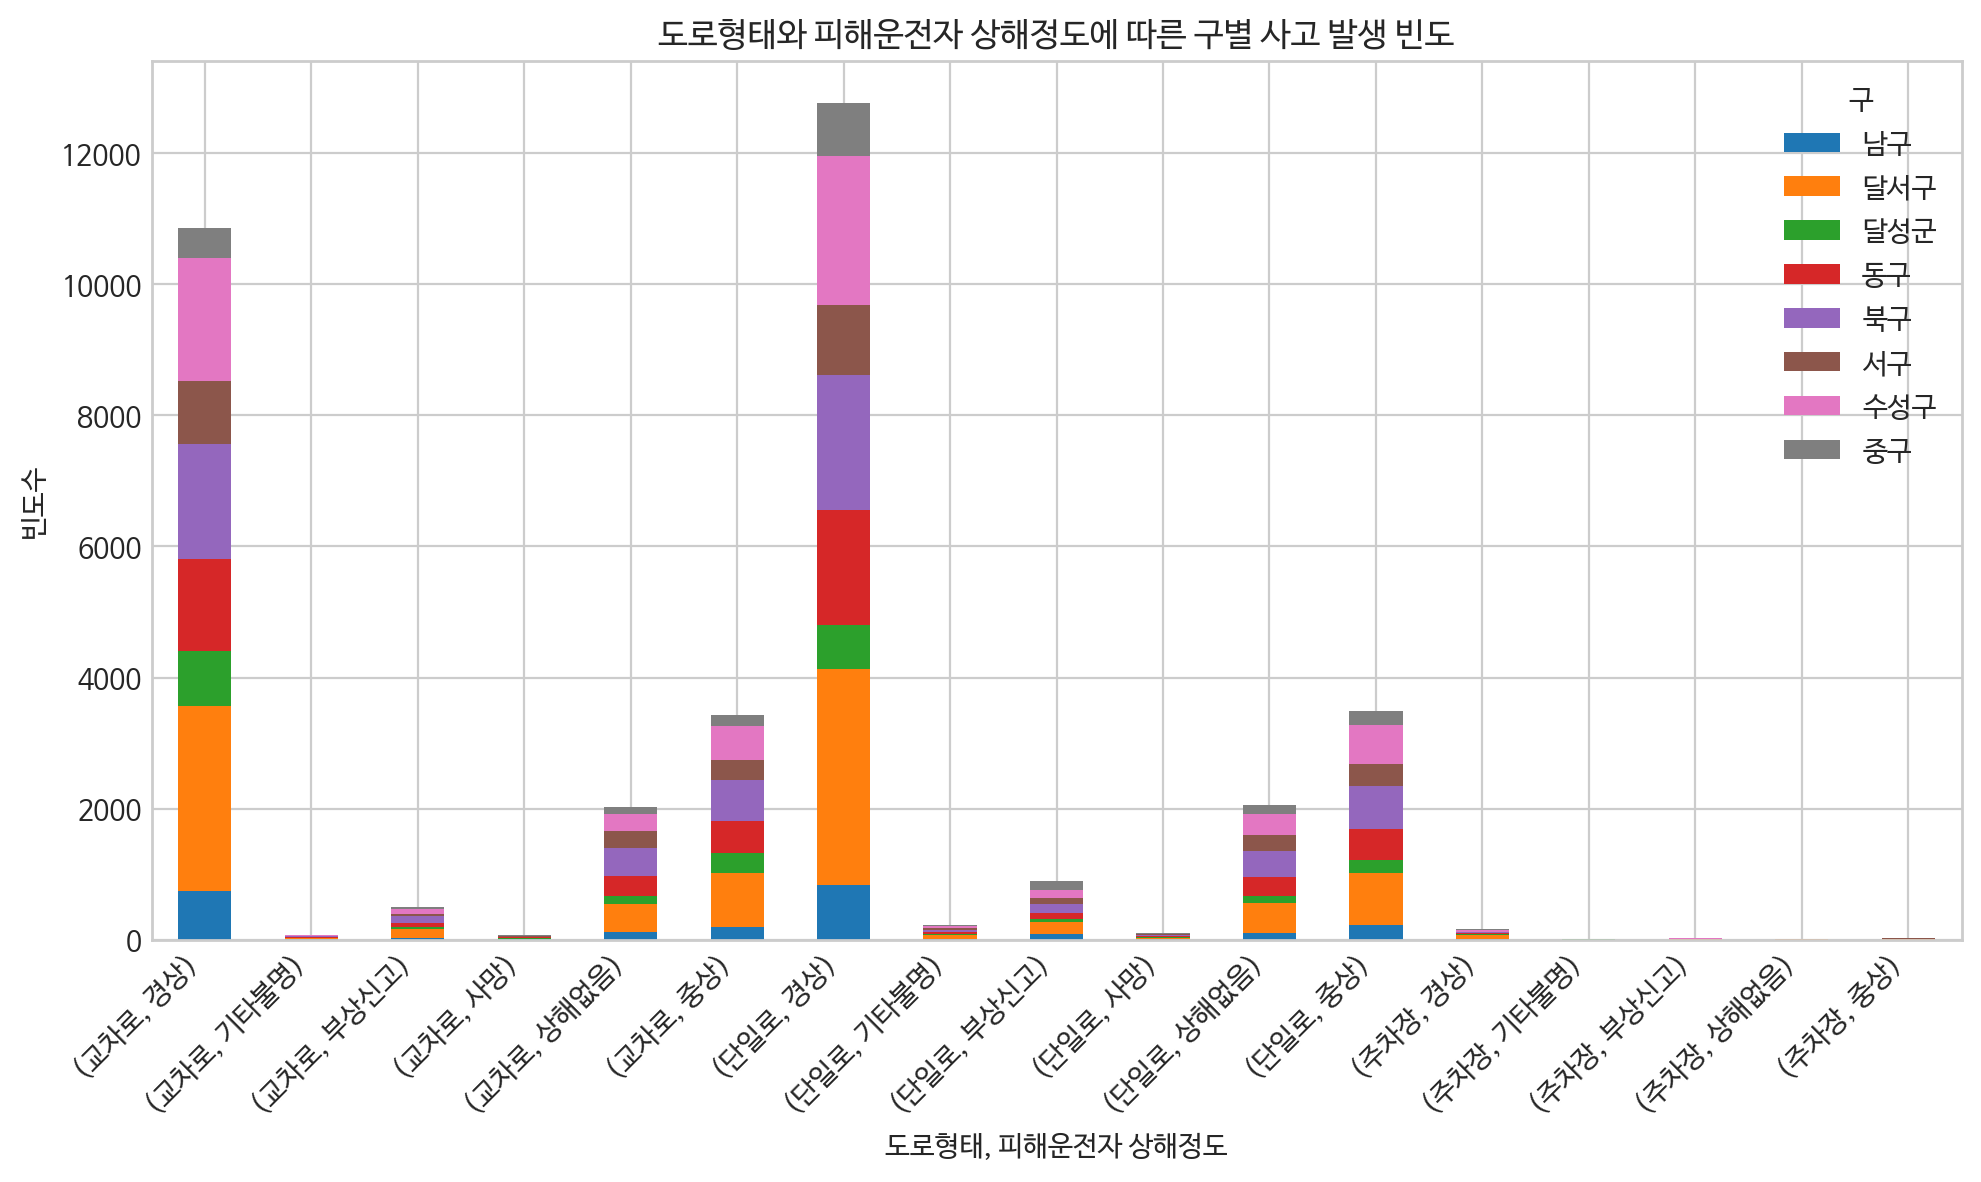

In [ ]:
pivot_table = pd.pivot_table(data_df, index=['도로형태','피해운전자 상해정도'], columns=['구'], aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('도로형태와 피해운전자 상해정도에 따른 구별 사고 발생 빈도')
plt.xlabel('도로형태, 피해운전자 상해정도')
plt.ylabel('빈도수')
plt.legend(title='구', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_df.groupby(['도로형태', '구'])['피해운전자 상해정도'].value_counts().unstack(fill_value=0)

피해운전자 상해정도    경상  기타불명  부상신고  사망  상해없음   중상
도로형태 구                                     
교차로  남구      740     5    32   7   113  189
     달서구    2819    16   130  10   433  831
     달성군     843     6    31   8   127  304
     동구     1403     8    63   9   300  480
     북구     1764    21   103  12   419  627
     서구      953     5    30   6   267  317
     수성구    1876    14    74   7   252  511
     중구      453     3    38   5   112  165
단일로  남구      828    14    91   4    97  226
     달서구    3304    55   186  18   459  785
     달성군     666    16    37  18   112  201
     동구     1751    29    86  19   294  483
     북구     2064    41   145  15   396  650
     서구     1063    19    97  11   234  331
     수성구    2279    34   109   8   326  599
     중구      811     9   138  11   144  209
주차장  남구        8     0     1   0     0    1
     달서구      57     2     6   0     5    8
     달성군      25     2     3   0     3    4
     동구       13     0     0   0     2    3
     북구       11     3     3   0     0    2
     서구        4     0     3   0     1    2
     수성구      37     0     4   0     3    4
     중구        4     0     1   0     0    1

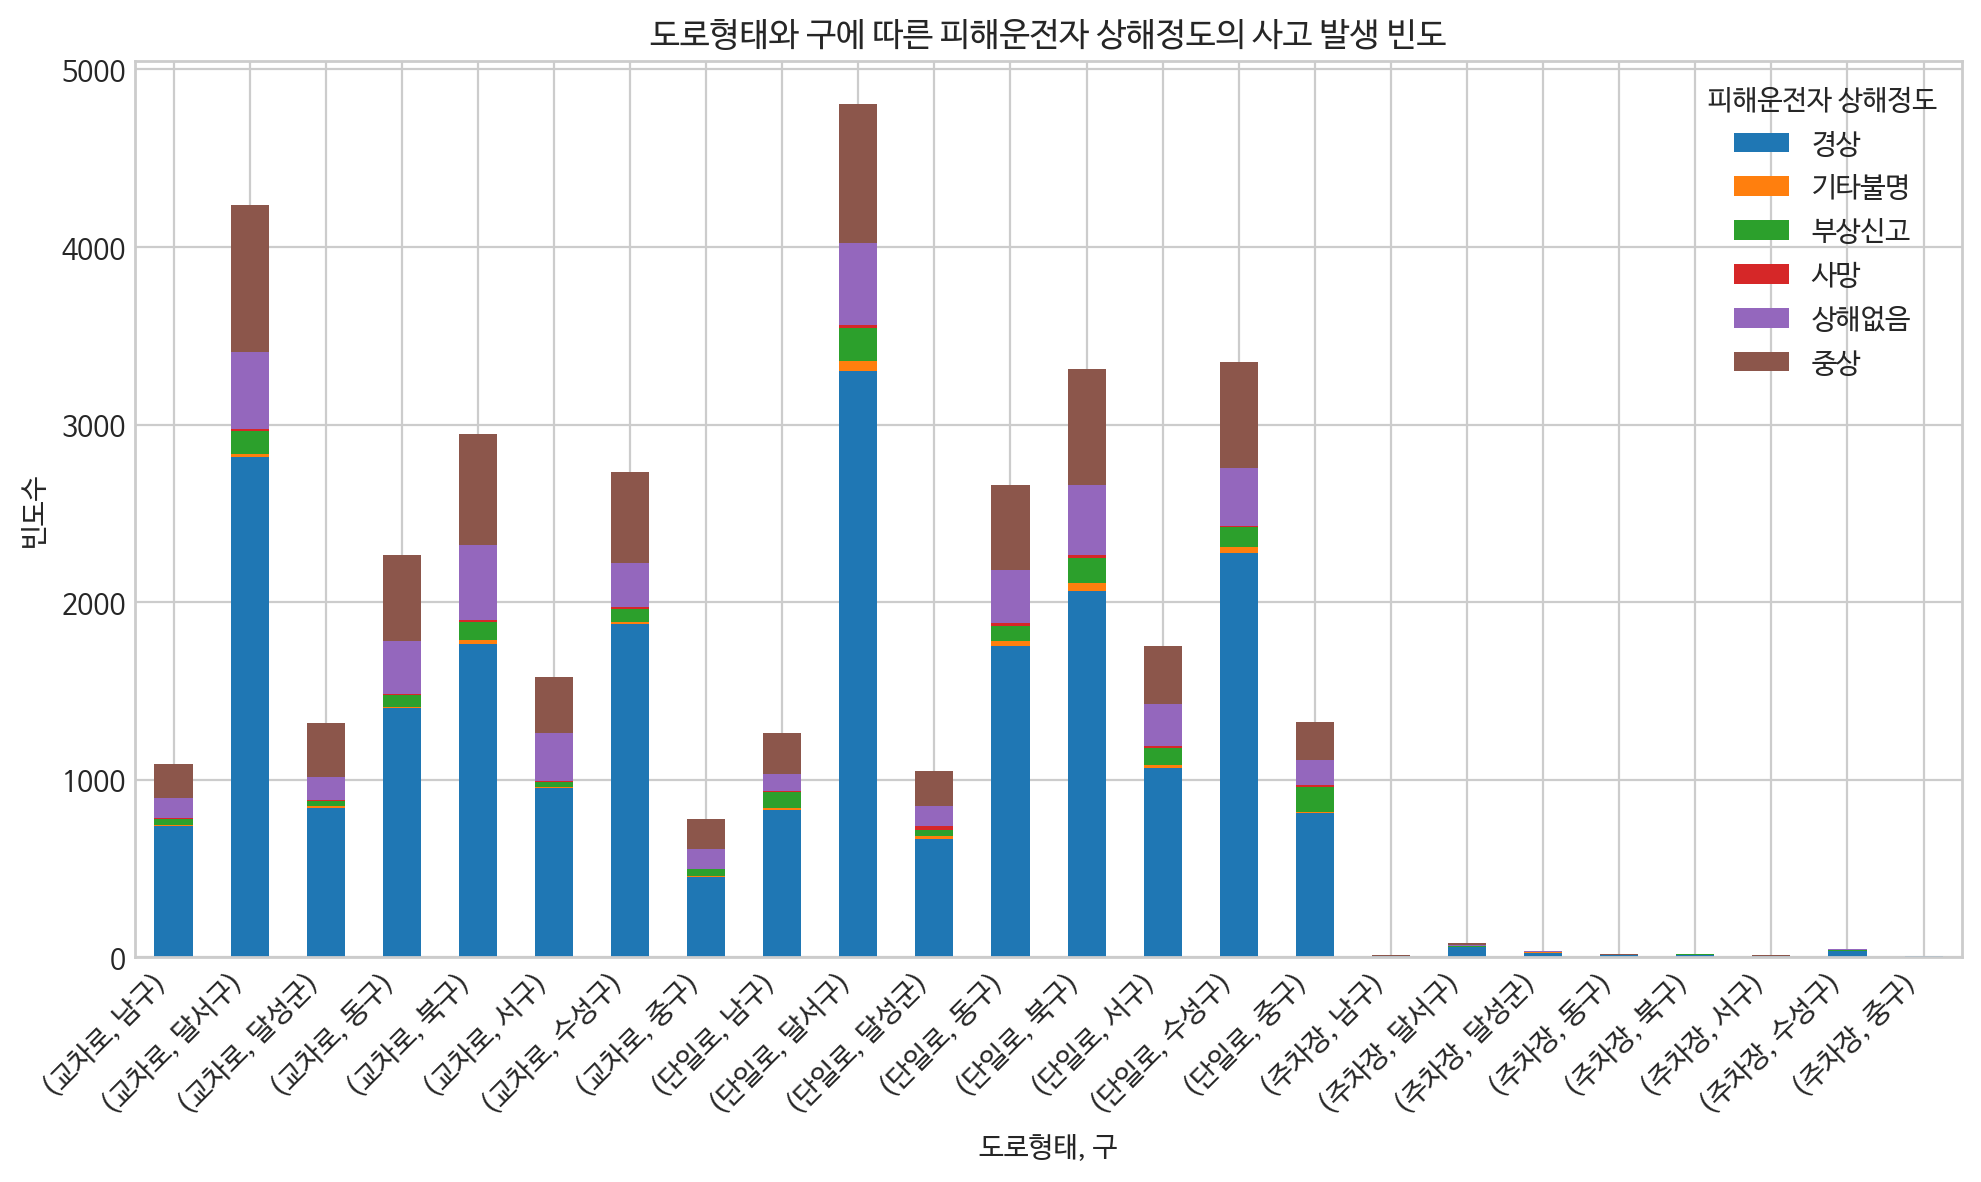

In [ ]:
pivot_table = data_df.groupby(['도로형태', '구'])['피해운전자 상해정도'].value_counts().unstack(fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('도로형태와 구에 따른 피해운전자 상해정도의 사고 발생 빈도')
plt.xlabel('도로형태, 구')
plt.ylabel('빈도수')
plt.legend(title='피해운전자 상해정도', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_df.groupby(['도로형태', '구'])['피해운전자 상해정도'].value_counts().unstack(fill_value=0).sum(axis=1).reset_index(name='총합')

,도로형태,구,총합
0,교차로,남구,1086
1,교차로,달서구,4239
2,교차로,달성군,1319
3,교차로,동구,2263
4,교차로,북구,2946
5,교차로,서구,1578
6,교차로,수성구,2734
7,교차로,중구,776
8,단일로,남구,1260
9,단일로,달서구,4807


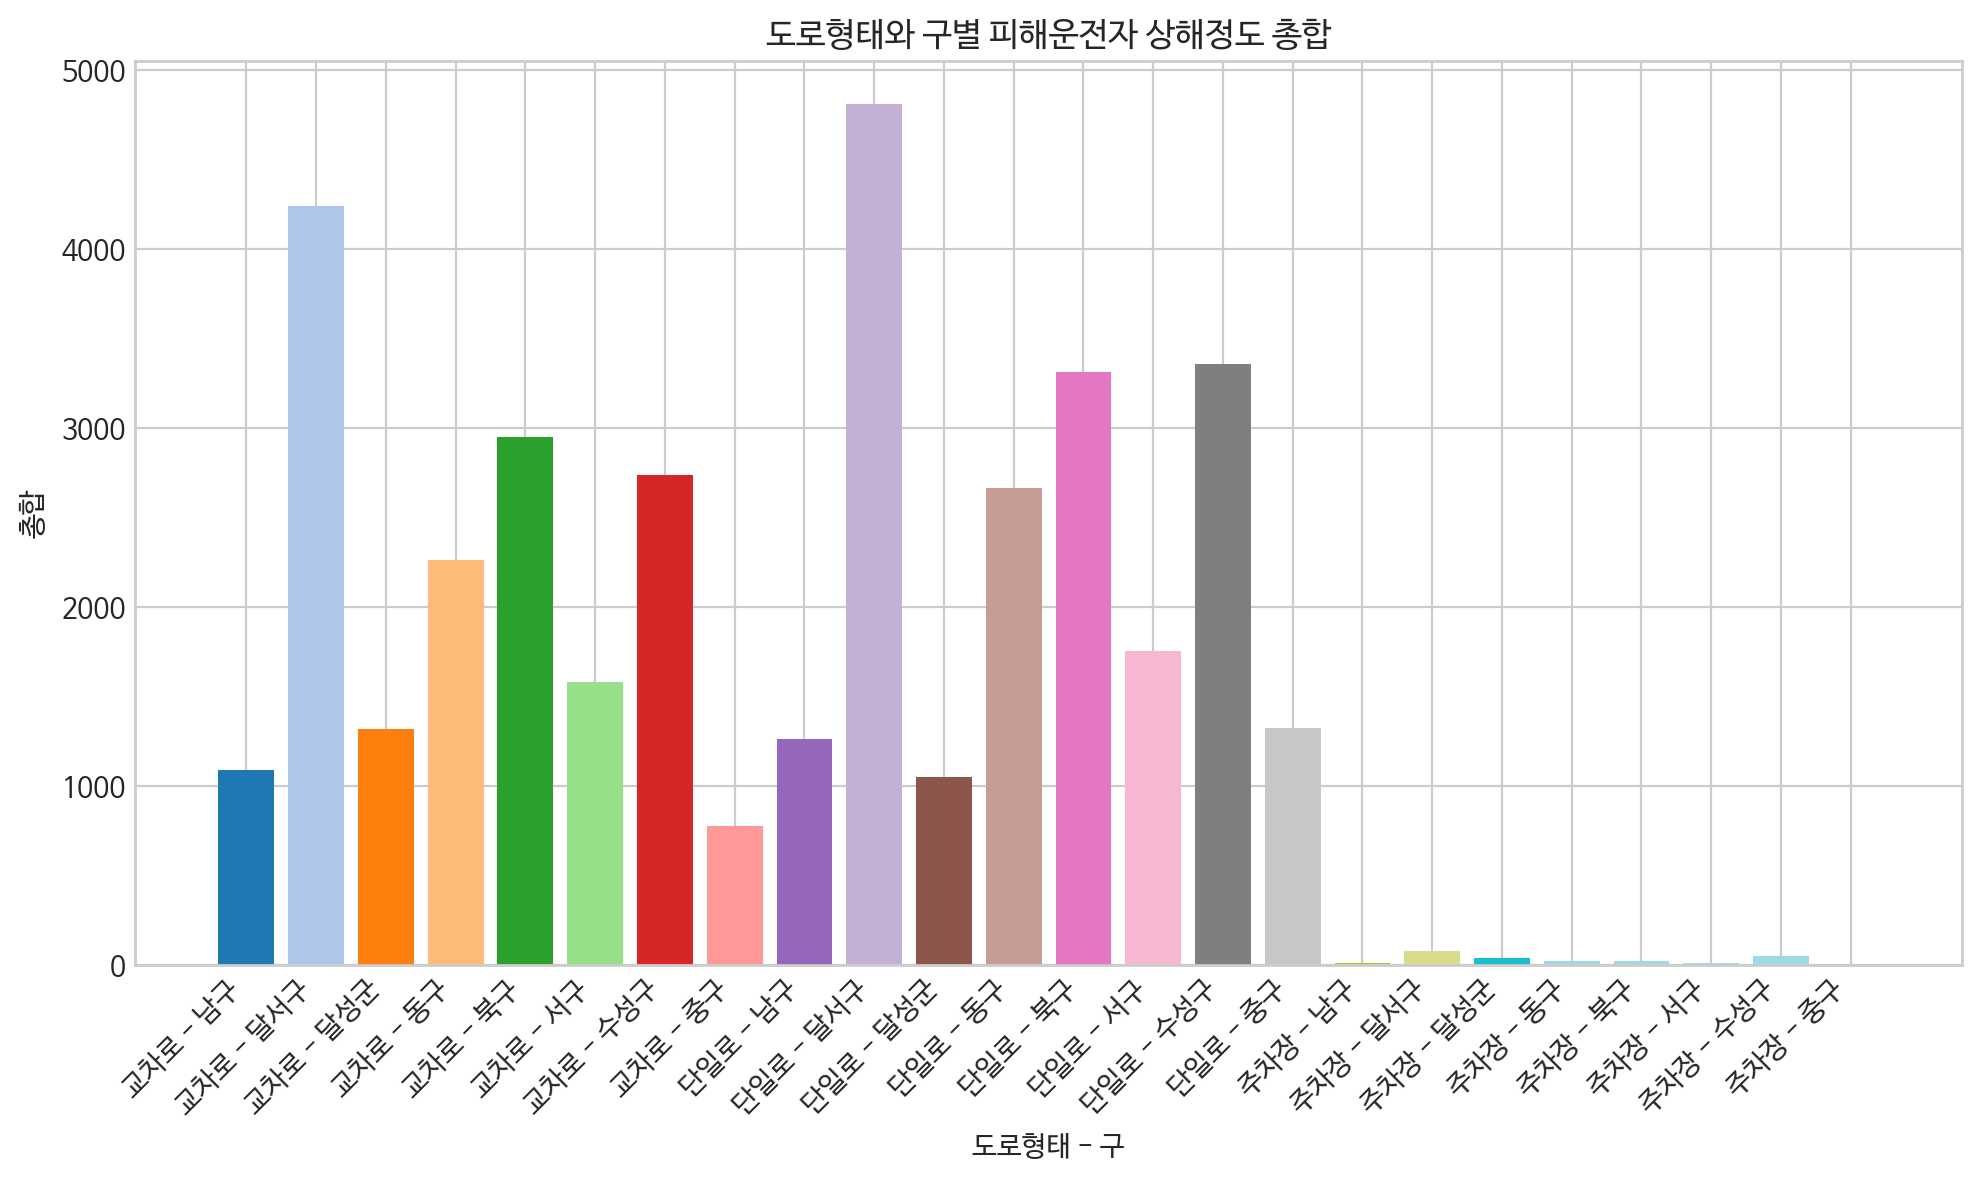

In [ ]:
total_counts = data_df.groupby(['도로형태', '구'])['피해운전자 상해정도'].value_counts().unstack(fill_value=0).sum(axis=1).reset_index(name='총합')

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.arange(len(total_counts)))
plt.bar(total_counts['도로형태'] + ' - ' + total_counts['구'], total_counts['총합'], color=colors)
plt.title('도로형태와 구별 피해운전자 상해정도 총합')
plt.xlabel('도로형태 - 구')
plt.ylabel('총합')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### model-basic

In [ ]:
feature_columns = data.columns.tolist()
target_column = '피해운전자 상해정도'
feature_columns.remove(target_column)

In [ ]:
data.columns

Index(['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',
       '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도'],
      dtype='object')

In [ ]:
X = data[feature_columns]
y = data[target_column]

In [ ]:
# one-hot encoding
X = pd.get_dummies(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(30894, 18272)
(7724, 18272)
(30894,)
(7724,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_X)
accuracy_score(y_pred, test_y)

0.6993785603314345

In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(test_X)
f1_score(test_y, y_pred, average='micro')

0.6993785603314345